Phân tích các yếu tố ảnh hưởng doanh thu toàn cầu của phim chiếu rạp (giai đoạn 2010-2020)

Nguồn: https://www.imdb.com/

| Tên thành viên | MSSV |
| --- | --- |
|Bùi Anh Khôi|19520649|
|Nguyễn Thị Thu Hà|19521456|
|Nguyễn Đình Quốc Bảo|19520402|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from ipywidgets import *
warnings.filterwarnings("ignore")

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

##

In [2]:
df = pd.read_csv('./data/data_preprocessed.csv')

# Thông tin sơ lược bộ dữ liệu sau khi xử lý

Thông tin

| STT | Tên thuộc tính | Mô tả | Kiểu |
| --- | --- | --- | --- |
|0|title|Tiêu đề phim|phân loại|
|1|casts|Diễn viên|phân loại|
|2|directors|Đạo diễn|phân loại|
|3|writers|Biên kịch|phân loại|
|4|genres|Các tổ hợp thể loại|phân loại|
|5|certificate|Chứng chỉ phân loại độ tuổi|phân loại|
|6|release_date|Thời điểm ra mắt (năm)|số|
|7|countries_of_origin|Quốc gia xuất sứ|phân loại|
|8|languages|Ngôn ngữ hỗ trợ|phân loại|
|9|production_companies|Hãng sản suất|phân loại|
|10|gross_worldwide|Doanh thu toàn cầu (đô la Mỹ)|số|
|11|budget|Kinh phí sản suất ước tính (đô la Mỹ)|số|
|12|runtime|Thời lượng phim (phút)|số|
|13|color|Màu phim|phân loại|
|14|sound_mix|Công nghệ âm thanh sử dụng trong phim|phân loại|
|15|aspect_ratio|Tỷ lệ khung hình|phân loại|
|16|score|Điểm đánh giá (trên thang 10)|số|
|17|votes|Số lượng người tham gia đánh giá|số|
|18|user_reviews|Số lượng bình luận của người dùng|số|
|19|critic_reviews|Số lượng bình luận của nhà phê bình|số|
|20|metascore|Điểm đánh giá của nhà phê bình|số|

Kiểu dữ liệu

In [3]:
df.dtypes

title                    object
casts                    object
directors                object
writers                  object
genres                   object
certificate              object
release_date            float64
countries_of_origin      object
languages                object
production_companies     object
gross_worldwide         float64
budget                  float64
runtime                 float64
color                    object
sound_mix                object
aspect_ratio             object
score                   float64
votes                   float64
user_reviews            float64
critic_reviews          float64
metascore               float64
dtype: object

Mô tả thống kê

In [4]:
df.describe()

release_date  gross_worldwide        budget      runtime         score  \
count  22165.000000     2.224500e+04  6.292000e+03  19985.00000  20294.000000   
mean    2015.450034     1.582416e+07  1.703714e+07    103.77373      5.920006   
std        3.046902     8.347394e+07  3.535144e+07     20.40872      1.141452   
min     2010.000000     2.000000e+00  2.591644e-03     45.00000      1.000000   
25%     2013.000000     3.640200e+04  1.160000e+06     90.00000      5.300000   
50%     2016.000000     3.589280e+05  4.200000e+06    100.00000      6.100000   
75%     2018.000000     3.059544e+06  1.500000e+07    113.00000      6.700000   
max     2021.000000     2.797501e+09  3.560000e+08    808.00000      9.400000   

              votes  user_reviews  critic_reviews    metascore  
count  22245.000000  22245.000000    22245.000000  5171.000000  
mean      14.290153     61.608092       37.784176    56.295301  
std       65.826653    264.532930       86.703250    17.166305  
min        0.000000      0.000000        0.000000     1.000000  
25%        0.103000      1.000000        0.000000    44.000000  
50%        0.545000      4.000000        5.000000    57.000000  
75%        3.100000     24.000000       28.000000    69.000000  
max     2200.000000  11100.000000     1000.000000   100.000000

Số lượng dữ liệu bị khuyết trên từng thuộc tính

In [5]:
df.isnull().sum()

title                       0
casts                    1746
directors                1705
writers                  2573
genres                   1774
certificate             13360
release_date               80
countries_of_origin      1186
languages                1378
production_companies     3352
gross_worldwide             0
budget                  15953
runtime                  2260
color                    2072
sound_mix               15911
aspect_ratio            10799
score                    1951
votes                       0
user_reviews                0
critic_reviews              0
metascore               17074
dtype: int64

Phần trăm dữ liệu bị khuyết sau khi đã drop bỏ các sample bị khuyết doanh thu

In [6]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
release_date             0.359631
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
gross_worldwide          0.000000
budget                  71.714992
runtime                 10.159586
color                    9.314453
sound_mix               71.526186
aspect_ratio            48.545741
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
dtype: float64

- Feature certificate, budget, metascore, aspect_ratio, sound_mix có tỷ lệ missing value khá lớn
- Feature votes - user_reviews - critic_reviews các missing value đã được điền khuyết với giá trị 0 (tương ứng với không có vote hoặc review)

# Basic EDA & Visualization
Các biến có ảnh hưởng
Genres,
Certificate,
Release Date,
Countries,
Languages,
Budget,
Votes

## Title

Top tự phim

In [7]:
def top_phim(top, TangDan):
    print(df.sort_values('gross_worldwide', ascending=TangDan)[['title', 'gross_worldwide']].head(top))
    
interact(top_phim, top = IntSlider(min=3, max=20), TangDan=[True, False])
pass

interactive(children=(IntSlider(value=3, description='top', max=20, min=3), Dropdown(description='TangDan', op…

In [8]:
def getList(feature):
    gs = df[feature]

    gs.dropna(inplace=True)

    gList = ''

    for g in gs:
        gList = gList + g

    gList = list(set(gList.split(',')))
    try:
        gList.remove('')
    except:
        pass
    return gList

## Genres

Số lượng tổ hợp thể loại phim

In [9]:
df['genres'].unique().shape[0]

1553

Có 1553 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên ta chỉ xét 50 tổ hợp có số phim lớn nhất.

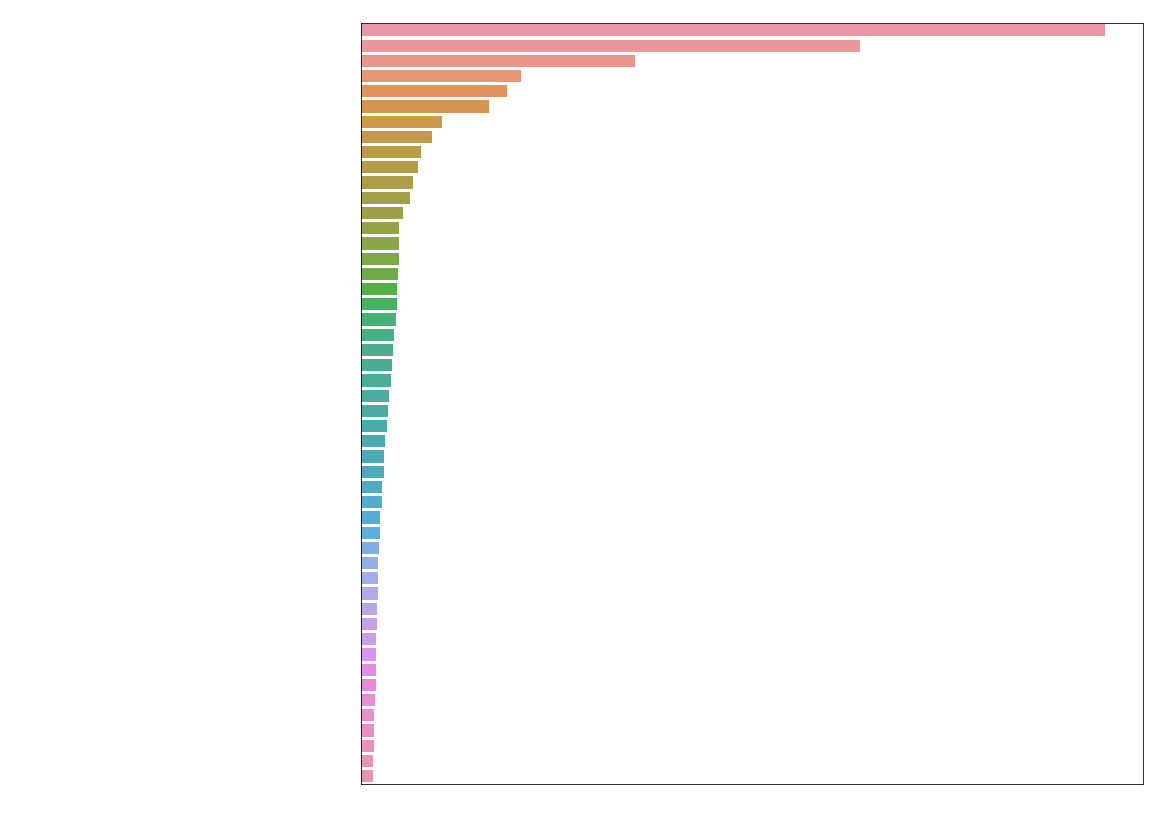

In [10]:
y = df.groupby("genres")['genres'].count().nlargest(50)
x = y.index 
 
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.barplot(x= y, y = x)
ax.set(title = 'Genres')
ax.set(xlabel = 'Quantity') 
ax.set(ylabel = '') 

plt.show()

- Thể loại drama/comedy là thể loại được sản xuất chủ yếu trong dataset (vị trí thứ 1 và 2)
- Phim với thể loại drama kết hợp comedy theo sau ở vị trí thứ 3.

=> Thể loại drama/comedy khá được ưu ái bởi các nhà sản xuất phim.

<?> Liệu khán giả có đón nhận những thể loại phim như thế này không? (Tính tổng doanh thu)


In [11]:
drama = comedy = dracome = 0
for i in range(len(df)):
    if df['genres'][i] == 'Drama,':
        drama += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,':
        comedy += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,Drama,':
        dracome += df['gross_worldwide'][i]

genres_gross = [drama, comedy, dracome]
for tl, dt in zip(['drama', 'comedy', 'drama, comedy'], genres_gross):
    print(tl, dt, '$')

drama 6298277722.0 $
comedy 14131645308.0 $
drama, comedy 7340333519.0 $


Thể loại riêng lẻ

In [12]:
genreList = getList('genres')
print(len(genreList), 'Gồm thể loại:')
for stt, genre in zip(range(0, len(genreList)), genreList):
    if stt+1 < 10:
        print(f"{stt+1}  {genre}")
    else:
        print(f"{stt+1} {genre}")

22 Gồm thể loại:
1  Crime
2  Drama
3  Mystery
4  Reality-TV
5  Western
6  Horror
7  Romance
8  Animation
9  Fantasy
10 Music
11 Musical
12 Sci-Fi
13 War
14 Family
15 Comedy
16 History
17 Biography
18 Sport
19 News
20 Action
21 Adventure
22 Thriller


Số lượng phim theo từng thể loại

Drama         11450
Comedy         7690
Thriller       3803
Romance        3487
Action         3078
Crime          2209
Adventure      1859
Horror         1804
Family         1656
Fantasy        1443
Mystery        1435
Animation      1159
Sci-Fi          981
Biography       875
History         839
Music           802
War             577
Sport           391
Musical         317
Western         122
News              2
Reality-TV        1
Name: genre, dtype: int64


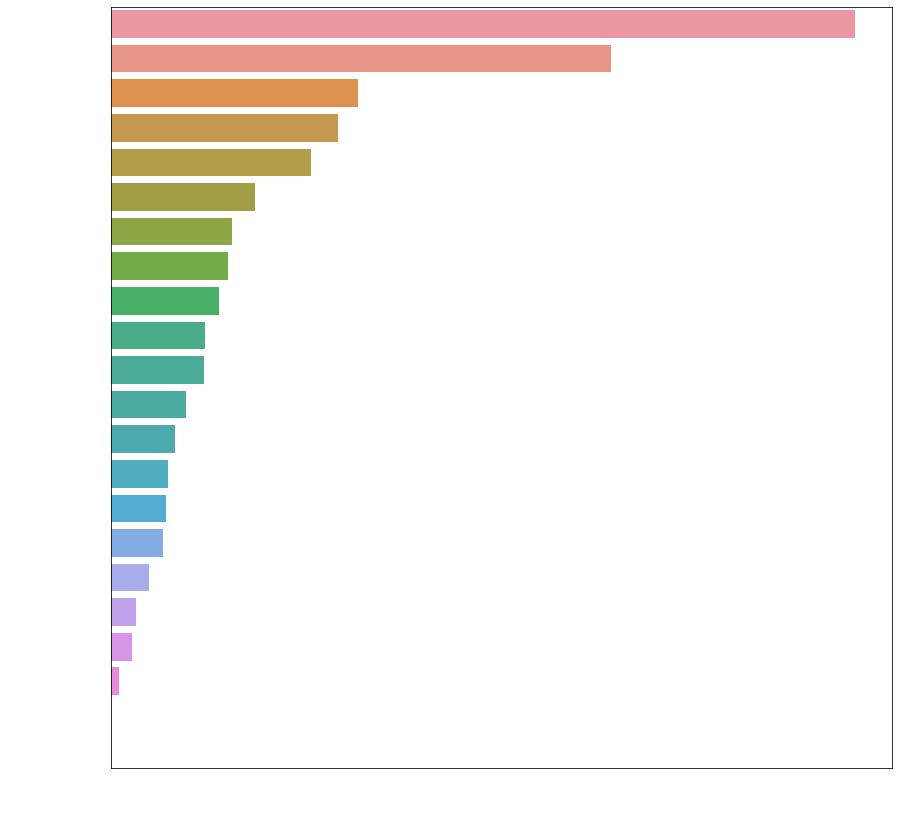

In [13]:
dataG = []
for genre in genreList:
    for line in df[df.genres.str.contains(genre, na=False)].values:
        dataG.append((line[0], genre, line[10], line[6], line[16]))  
dataG = pd.DataFrame(data=dataG, columns=['title', 'genre', 'gross', 'year', 'score'])
print(dataG.genre.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="genre",data=dataG, order=dataG.genre.value_counts().index[0:23])
plt.ylabel('Genres', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

Top 3 thể loại phổ biến nhất: Drama, Comedy và Thriller với số lượng phim lần lượt là 11450, 7690 và 3803 phim.

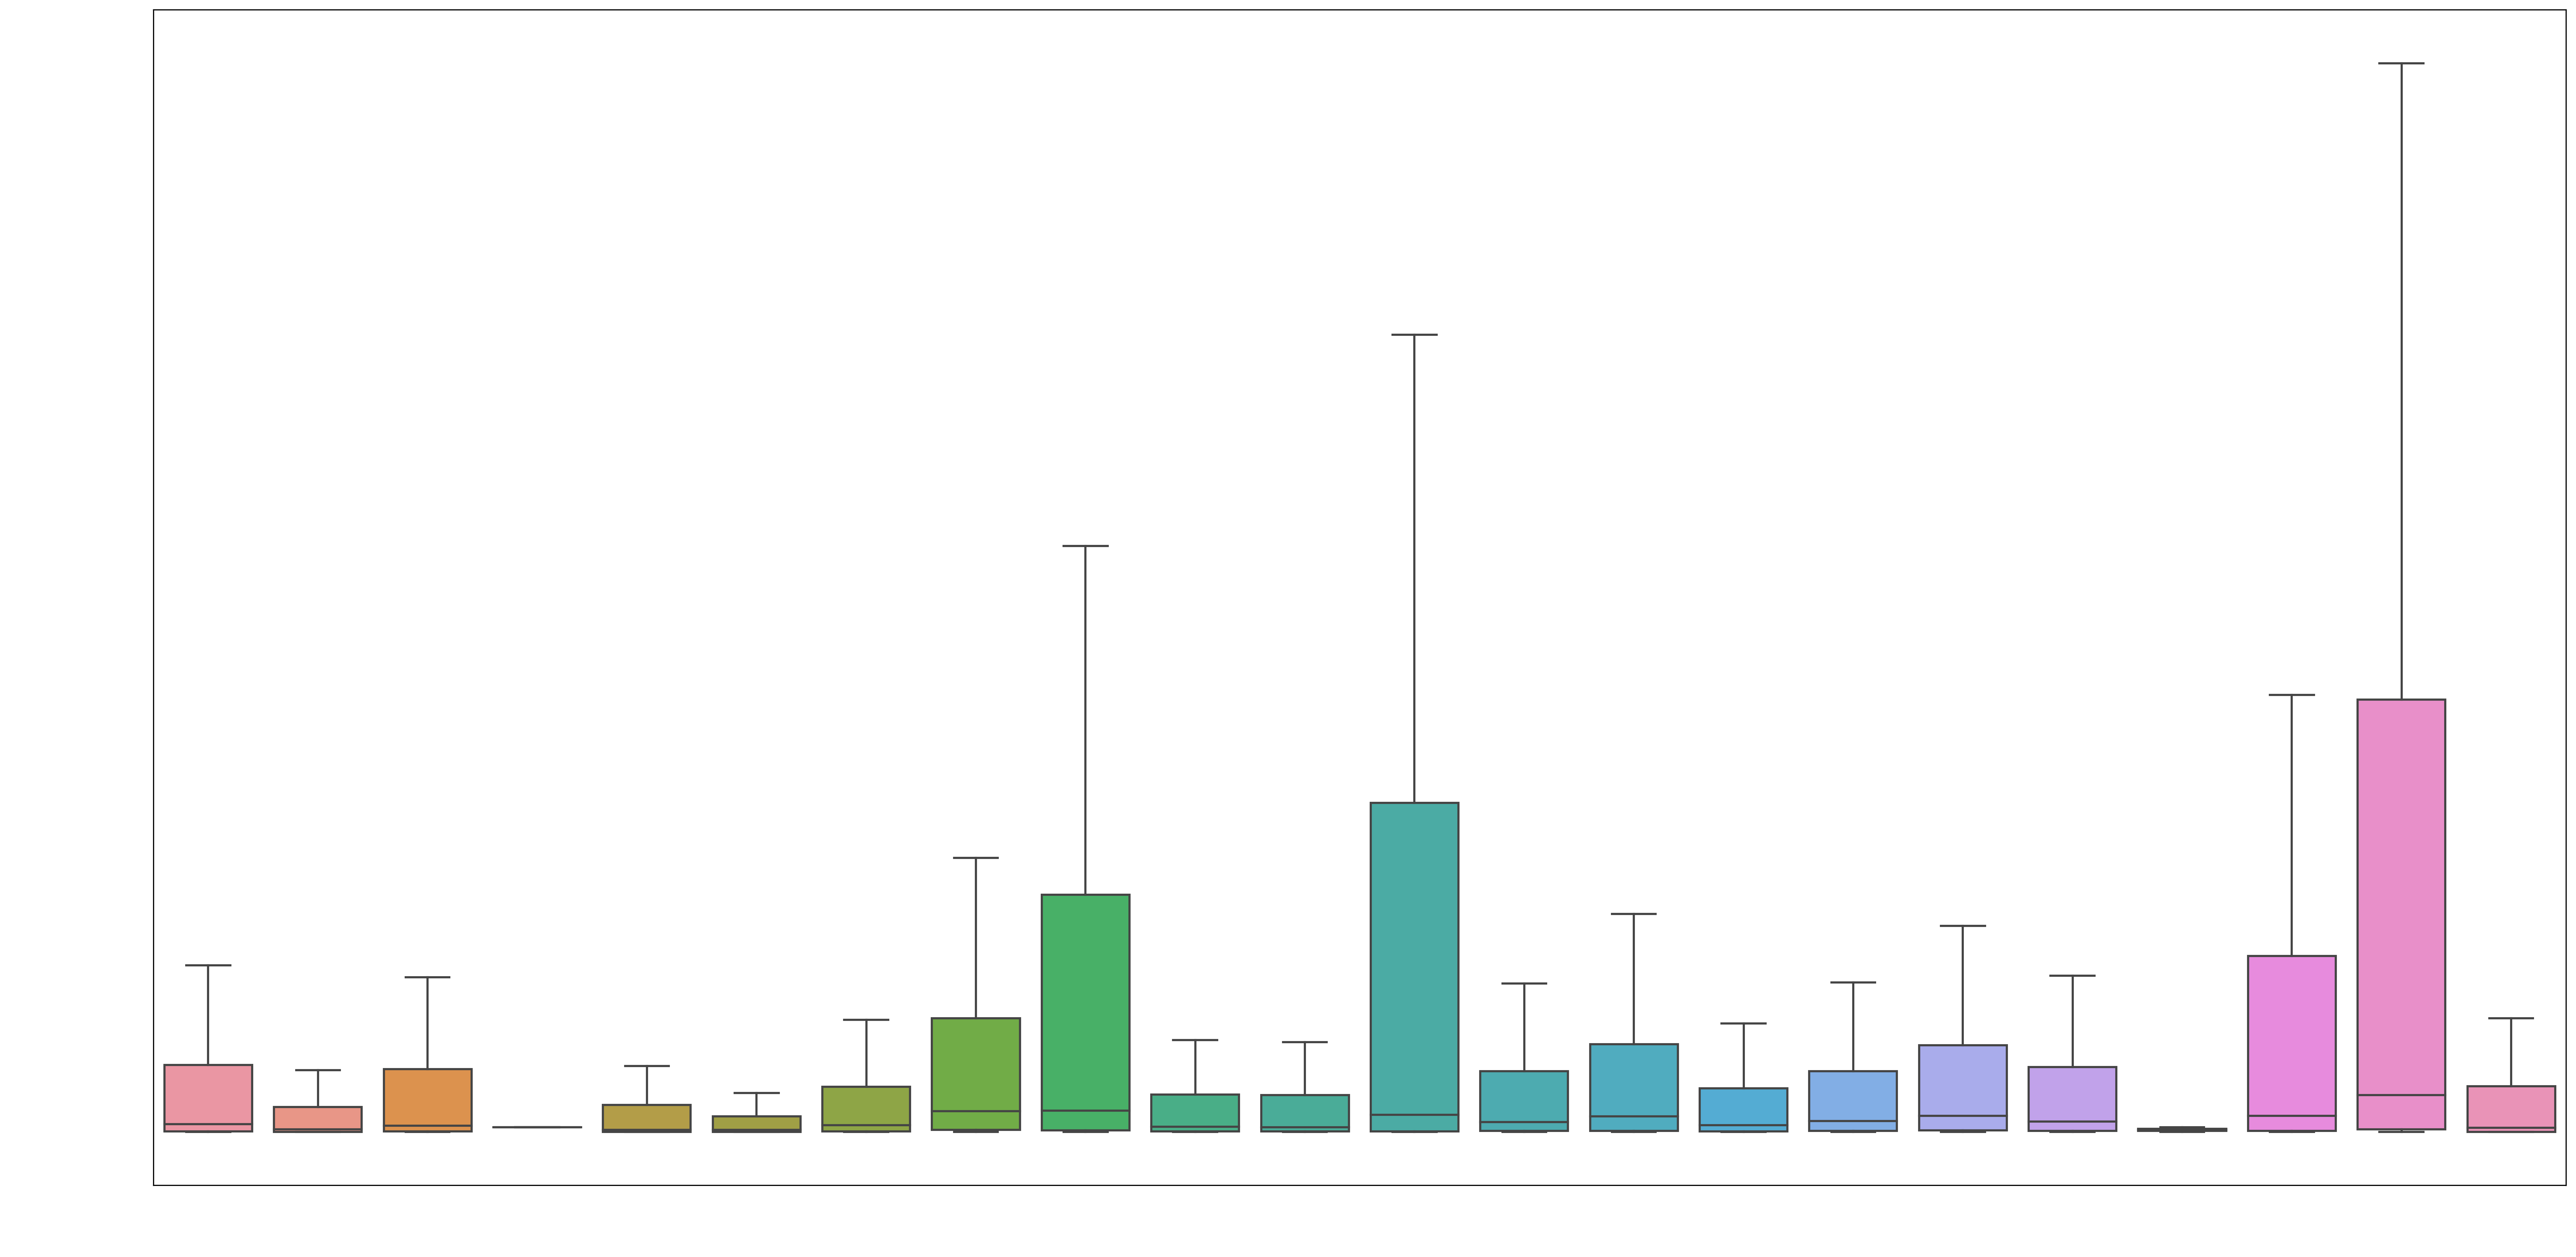

In [14]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.ticklabel_format(style='plain', axis='y')
fig.set_dpi(200)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.set_label_text(None, fontsize=20)   
ax.yaxis.set_label_text(None, fontsize=20)  
sns.boxplot(x='genre', y='gross', data=dataG, ax=ax, showfliers=False)
plt.show()

- Doanh thu phân bố không đều nhau giữa các thể loại.
- Các thể loại Adventure, Sci-Fi, Fantasy, Action có phân bố doanh thu trong các khoảng cao hơn các thể loại còn lại.

## Certificate

Số lượng chứng chỉ mỗi loại:
Unrated    2850
C13        2657
C16        1875
P           911
C18         592
Name: certificate, dtype: int64


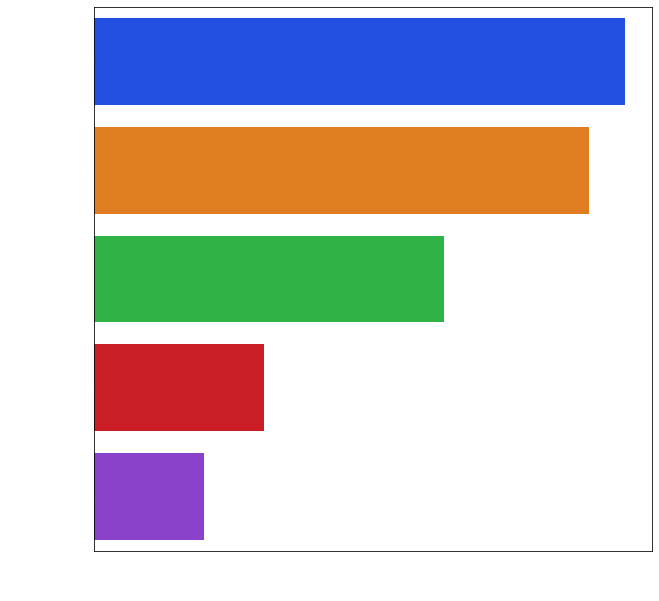

In [15]:
cert_size = df.groupby(['certificate'], dropna=False, as_index=False).size()
print('Số lượng chứng chỉ mỗi loại:') 
print(df.certificate.value_counts())
plt.figure(figsize=(10, 10))
sns.countplot(y="certificate",data=df, order=df.certificate.value_counts().index[0:5], palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng', fontsize=15)
plt.ylabel('Certificate', fontsize=15) 
plt.show()

Phân bố

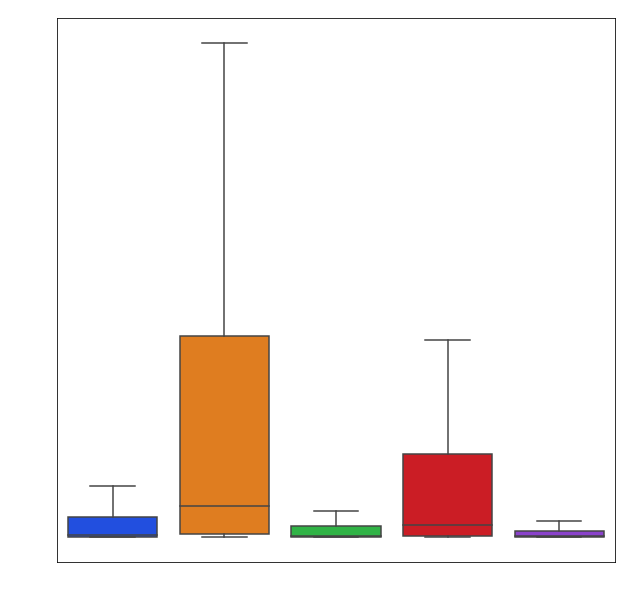

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['certificate'], y=df['gross_worldwide'], data=df, showfliers = False, palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Certificate', fontsize=15)
plt.ylabel('Gross', fontsize=15) 
plt.show()

- Phim với cert là C13 cho phân bố doanh thu lớn trong bộ dữ liệu.
- Trong khi đó phim với cert là P lại có phân bố doanh thu thấp hơn so với C13. 
(cert P là dành cho mọi lứa tuổi trong khi cert C13 là độ tuổi từ 13 trở lên)

## Release date

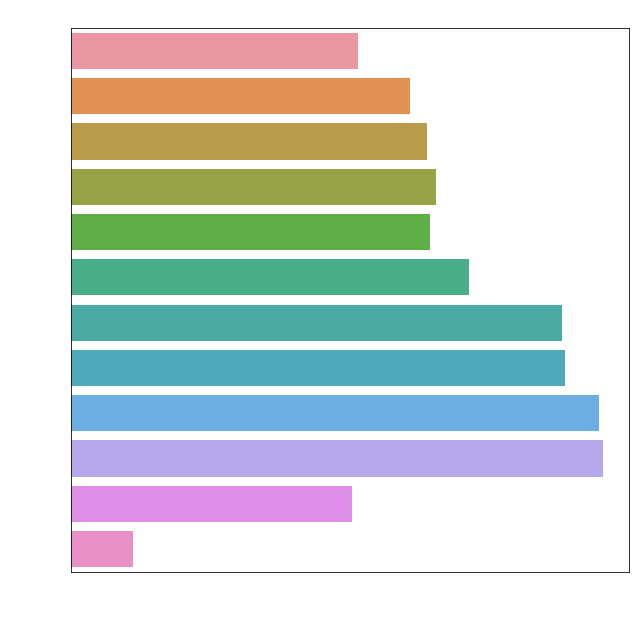

In [17]:
plt.figure(figsize=(10, 10))
sns.countplot(y="release_date",data=df, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.title('Yearly Analysis', fontsize= 20)
plt.ylabel('Year', fontsize=15) 
plt.show()

Nhận xét
- Số lượng phim tăng dần từ nằm 2010 - 2019
- Năm 2020 số lượng phim giảm mạnh có thể là do đại dịch

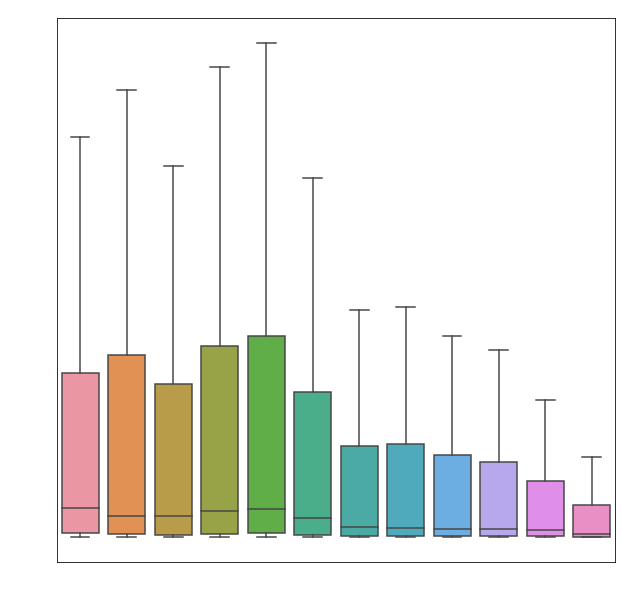

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Density', fontsize=15) 
plt.show()

*   Doanh thu trong khoảng thời gian [2010,2015] có sự phân bố khá là tương đồng và có sự giao động lớn.
*   Doanh thu trong khoảng thời gian [2016,2020] có sự phân bố khá là 
tương đồng và có xu hướng thấp hơn và ít giao động doanh thu của nhóm [2010,2015]. (Có thể là do giai đoạn này công nghệ đã phát triển, internet có khắp mọi nơi nên người xem không cần phải lên rạp mà có thể chờ có trên internet rồi coi để giảm chi phí nên doanh thu thấp hơn so với giai đoạn trước). 

## Countries

In [19]:
df.countries_of_origin.sample(1)

5541    France,
Name: countries_of_origin, dtype: object

In [20]:
cList = getList('countries_of_origin')
print(f'Đến từ {len(cList)} quốc gia:')
for stt, con in zip(range(0, len(cList)), cList):
    if stt+1 < 10:
        print(f"{stt+1}  {con}")
    else:
        print(f"{stt+1} {con}")

Đến từ 161 quốc gia:
1  Georgia
2  Venezuela
3  Sri Lanka
4  Norway
5  Uzbekistan
6  Algeria
7  Moldova
8  Afghanistan
9  Puerto Rico
10 Cambodia
11 Romania
12 Egypt
13 Colombia
14 Cape Verde
15 Haiti
16 Philippines
17 Bhutan
18 Cuba
19 Panama
20 Ethiopia
21 Nepal
22 Monaco
23 Malta
24 Saudi Arabia
25 South Korea
26 Czech Republic
27 Bolivia
28 Uruguay
29 Iceland
30 Morocco
31 Kazakhstan
32 Azerbaijan
33 Macao
34 Burkina Faso
35 Albania
36 Martinique
37 Vanuatu
38 Cayman Islands
39 United Arab Emirates
40 Dominica
41 Kosovo
42 Belarus
43 Laos
44 Syria
45 Belgium
46 Taiwan
47 Vietnam
48 Russia
49 South Africa
50 Kyrgyzstan
51 Somalia
52 Western Sahara
53 Cook Islands
54 China
55 Antarctica
56 The Democratic Republic of Congo
57 Tunisia
58 New Zealand
59 United Kingdom
60 Kuwait
61 Iraq
62 Trinidad and Tobago
63 Italy
64 Bahrain
65 Cyprus
66 Qatar
67 Nigeria
68 Maldives
69 Guatemala
70 Ghana
71 Barbados
72 Occupied Palestinian Territory
73 Lesotho
74 Myanmar
75 Mongolia
76 Israel
77 Germ

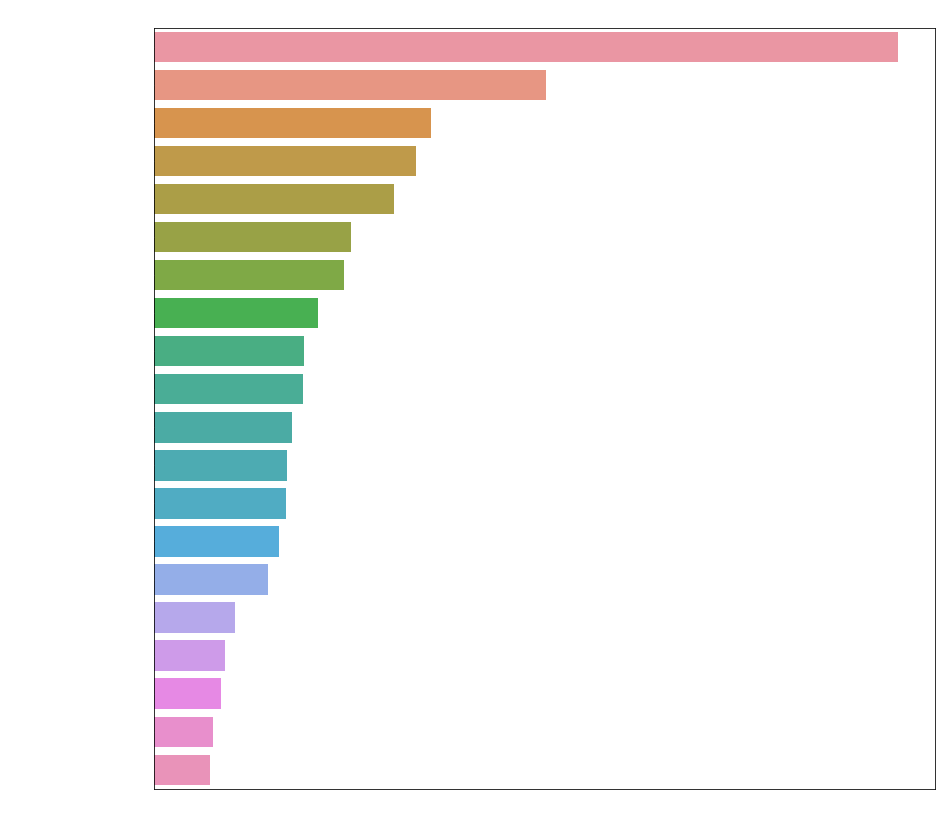

In [21]:
dataC = []
for con in cList:
    for line in df[df.countries_of_origin.str.contains(con, na=False)].values:
        dataC.append((line[0], con, line[10]))  
dataC = pd.DataFrame(data=dataC, columns=['title', 'country', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15) 
plt.title('Top 20 country', fontsize=20)
sns.countplot(y="country",data=dataC, order=dataC.country.value_counts().index[0:20])
plt.show()

Nhận xét 3 quốc gia tham gia sản xuất nhiều phim nhất là US, France và kế tiếp là India

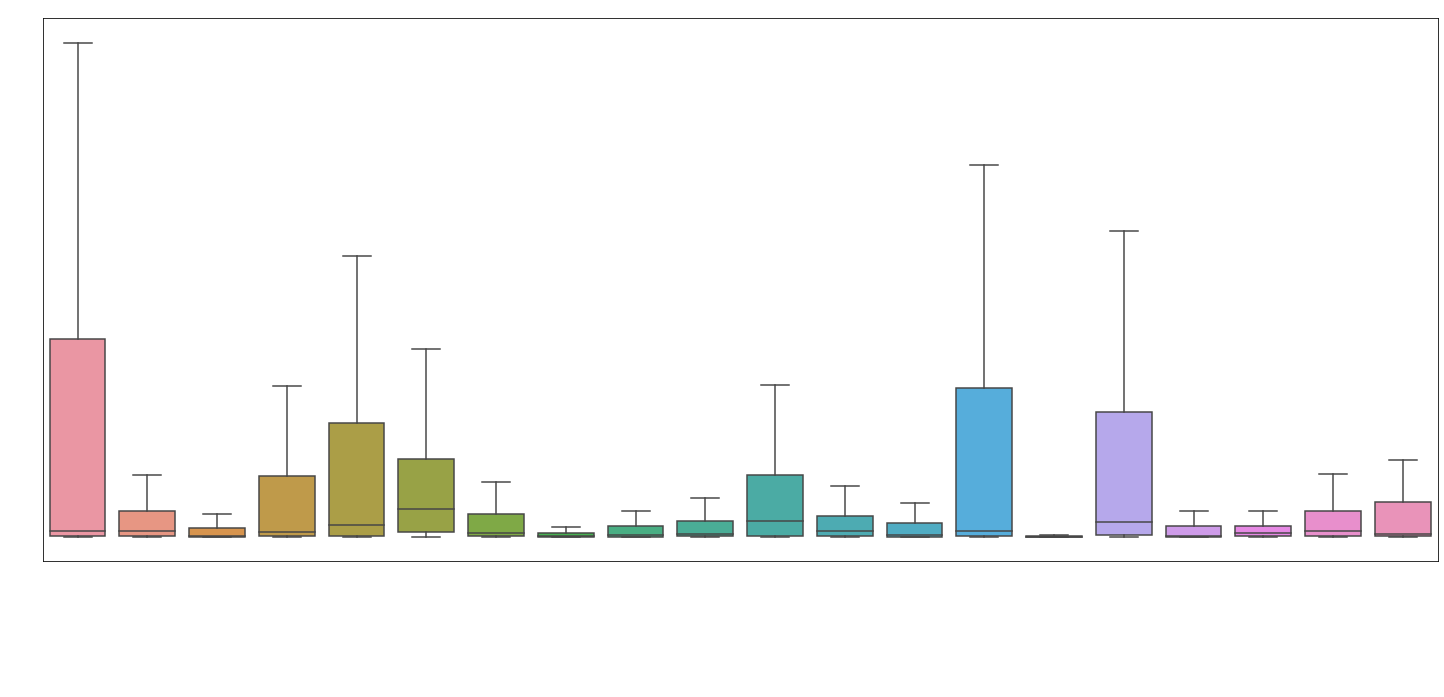

In [22]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=dataC["gross"], x=dataC.country,
            showfliers=False, order=dataC.country.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=50)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Nhận xét giữa các quốc gia có sự chênh lệch về  phân bố doanh thu

## Languages

In [23]:
df.languages.sample(1)

10264    Italian,
Name: languages, dtype: object

In [24]:
lList = getList('languages')
print(f'Gồm {len(lList)} ngôn ngữ:')
for stt, lang in zip(range(0, len(lList)), lList):
    if stt+1 < 10:
        print(f"{stt+1}  {lang}")
    else:
        print(f"{stt+1} {lang}")

Gồm 228 ngôn ngữ:
1  Slovenian
2  Sumerian
3  Malay
4  Hassanya
5  Tonga (Tonga Islands)
6  Visayan
7  Latvian
8  Romansh
9  Central Khmer
10 Armenian
11 Persian
12 Norse
13 Dari
14 Nyanja
15 Chinese
16 Corsican
17 Tamashek
18 Filipino
19 Zulu
20 Brazilian Sign Language
21 Haitian
22 American Sign Language
23 Berber languages
24 Bonda
25 Croatian
26 Tswana
27 Crimean Tatar
28 Lao
29 North American Indian
30 Tzotzil
31 Italian
32 Montagnais
33 Latin
34 Central American Indian languages
35 Amharic
36 Kinyarwanda
37 Assamese
38 Wolof
39 Catalan
40 Micmac
41 Navajo
42 Karen
43 Ojibwa
44 Dutch
45 Sanskrit
46 Maya
47 Indian Sign Language
48 Kriolu
49 Hausa
50 Malayalam
51 Maori
52 Czech
53 Mapudungun
54 Santali
55 Pashtu
56 Papiamento
57  Ancient (to 1453)
58 Lingala
59 Sinhala
60 Cheyenne
61 Sranan
62 Akan
63 Marathi
64 Old English
65 Serbian
66 French
67 Galician
68 Aymara
69 Aramaic
70 Kyrgyz
71 Hokkien
72 Aboriginal
73 Swedish
74 Abkhazian
75 Danish
76 Kikuyu
77 Australian Sign Language


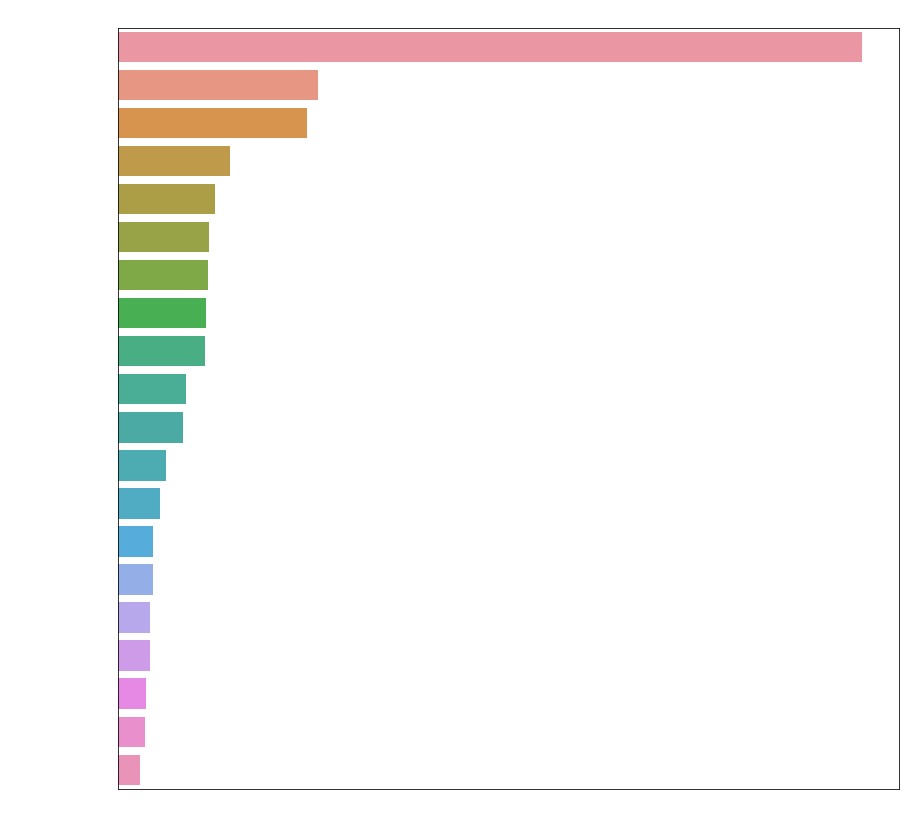

In [25]:
dataL = []
for lang in lList:
    for line in df[df.languages.str.contains(lang, na=False)].values:
        dataL.append((line[0], lang, line[10]))  
dataL = pd.DataFrame(data=dataL, columns=['title', 'language', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Languages', fontsize=15)
plt.title('Top 20 used languages', fontsize=20)
dataL.language.value_counts()
sns.countplot(y="language",data=dataL, order=dataL.language.value_counts().index[0:20])
plt.show()

Hầu hết các phim khi ra rạp đều có ngôn ngữ là tiếng Anh

In [26]:
def plot_lang(showFliers):
    plt.figure(figsize=(25, 10))
    sns.boxplot(y=dataL["gross"], x=dataL["language"],
                showfliers=showFliers, order=dataL.language.value_counts().index[0:20])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Languages', fontsize=15)
    plt.ylabel('Gross', fontsize=15)
    plt.show()

interact(plot_lang, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

- Có sự khác biệt về phân bố doanh thu giữa các loại ngôn ngữ
- Phim có hỗ trợ ngôn ngữ l2 Mandarin, Cantonese, Chinese, Korean, Janpanese có phân bố cao hơn

Số lượng ngôn ngữ ảnh hưởng như thế nào đến doanh thu phim

In [27]:
df_num = pd.DataFrame(dataL["title"].value_counts(
).rename_axis('title').reset_index(name='count'))

result = pd.merge(dataL, df_num, on="title").drop_duplicates(
    'title', keep='last').drop(columns=['language'])
print('Phim có nhiều ngôn ngữ nhất: ')
result[result['count'] == result['count'].max()][['title', 'count']]

Phim có nhiều ngôn ngữ nhất: 


title  count
83    Testing Movie1     18
421  The Jungle Book     18

Phân bố của số lượng ngôn ngữ phim

In [28]:
result['count'].value_counts()

1     15243
2      3391
3      1203
4       468
5       180
6        68
7        23
8         8
9         5
18        2
11        2
10        1
Name: count, dtype: int64

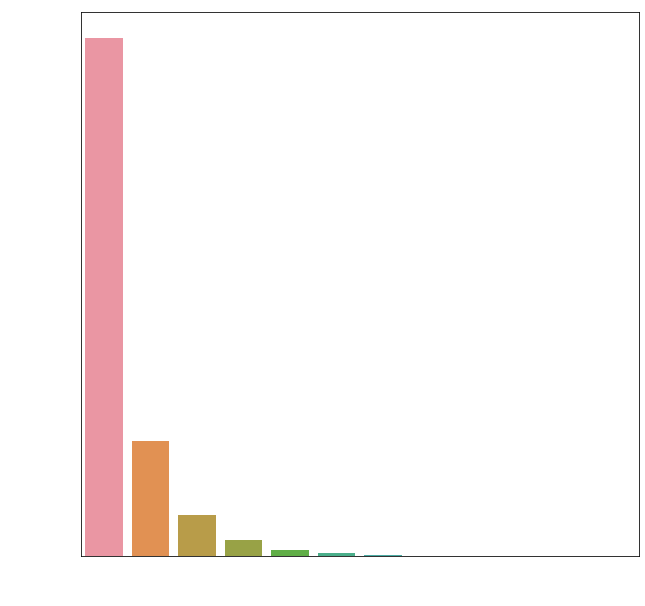

In [29]:
plt.figure(figsize=(10, 10))
sns.countplot(x='count', data=result)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng ngôn ngữ', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Nhận xét phần lớn là phim chỉ hỗ trợ một ngôn ngữ

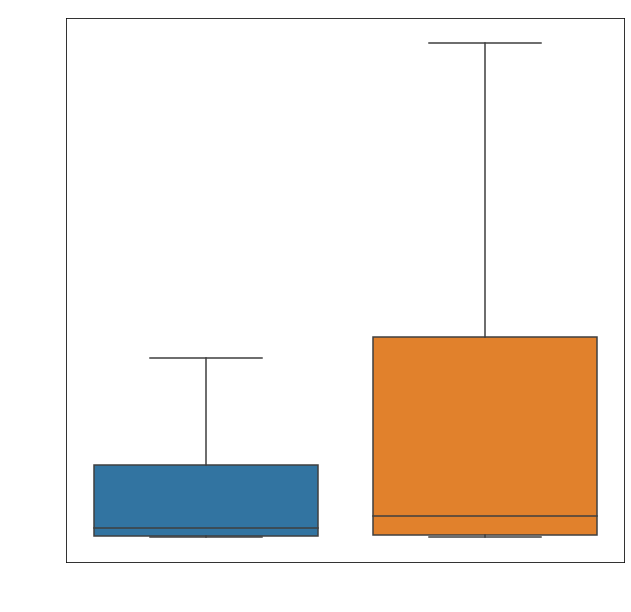

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=result["gross"], x=result['count'] > 1, showfliers=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Có nhiều hơn một ngôn ngữ?', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Việc nhiều hơn một 1 ngữ có thể ảnh hưởng đến doanh thu.

In [31]:
print('Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu:', result.corr()['gross']['count'])

Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu: 0.1356262681630484


=> Gần như không có sự tương quan

## Meta score

Regplot

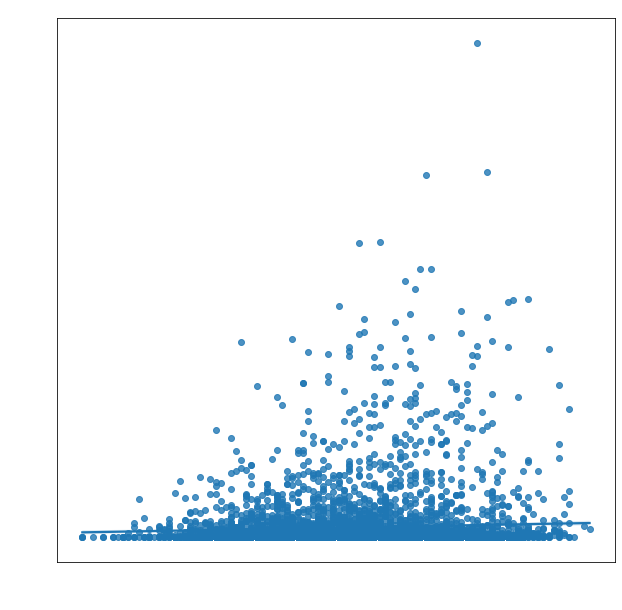

In [32]:
plt.figure(figsize=(10, 10)) 
sns.regplot(x='metascore', y='gross_worldwide', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Metascore', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [33]:
df.corr()['gross_worldwide']['metascore']

0.05572804049631602

## Runtime

In [34]:
print('- Phim có thời lượng lớn nhất:', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .max()].to_string(index=False, header=False))
print('- Phim có thời lượng nhỏ nhất nhất:\n', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .min()].to_string(index=False, header=False))
print('- Thời lượng phim trung bình:', df['runtime'].mean())
print('- Thời lượng phim trung vị:', df['runtime'].median()) 

- Phim có thời lượng lớn nhất: La flor 808.0
- Phim có thời lượng nhỏ nhất nhất:
 Ernest et Célestine en hiver 45.0
                   Cassandra 45.0
        Qing zhou shan shang 45.0
                     45 Days 45.0
    MULT v kino. Vypusk # 16 45.0
                 Free Spirit 45.0
- Thời lượng phim trung bình: 103.77373029772329
- Thời lượng phim trung vị: 100.0


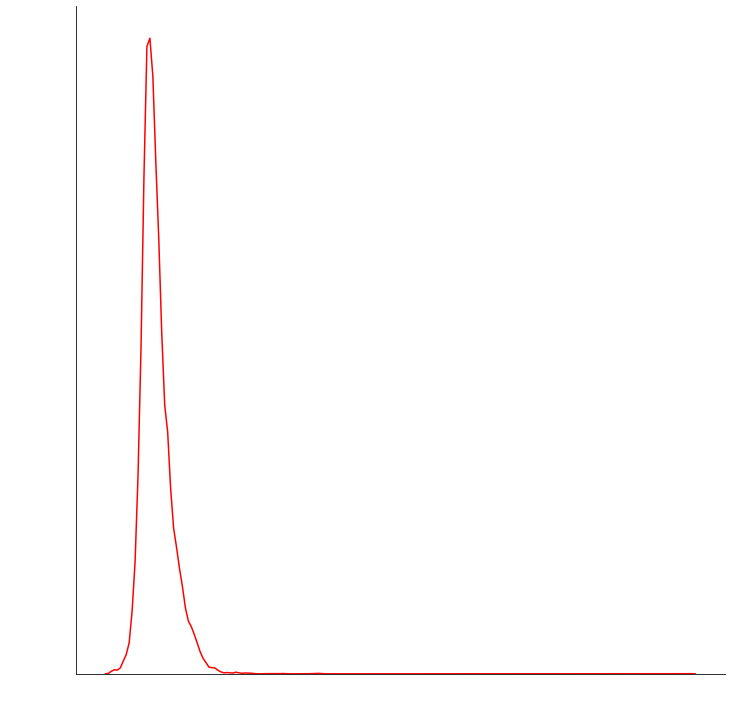

In [35]:
sns.displot(x='runtime', data=df, kind="kde", height=10 , aspect = 1, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [36]:
def rt_plot(showfliers):
    plt.figure(figsize=(10, 10)) 
    sns.boxplot(x='runtime', data=df, showfliers=showfliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Runtime', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()
    
interact(rt_plot, showfliers=[False, True])
pass

interactive(children=(Dropdown(description='showfliers', options=(False, True), value=False), Output()), _dom_…

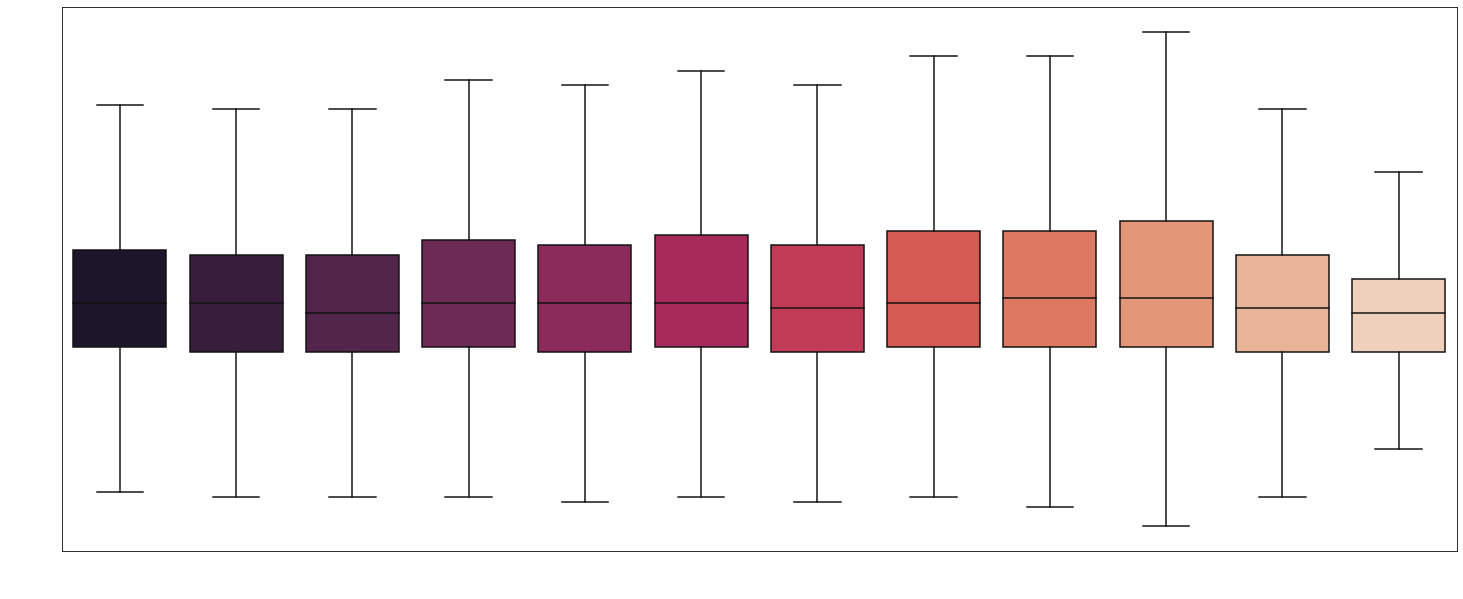

In [37]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=df['runtime'], x=df['release_date'], data=df, showfliers = False, palette='rocket')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim trong 10 năm không có quá nhiều sự thay đổi, tuy nhiên vào năm 2019 thì phim có thời lượng cao hơn tương đối so với những năm còn lại.

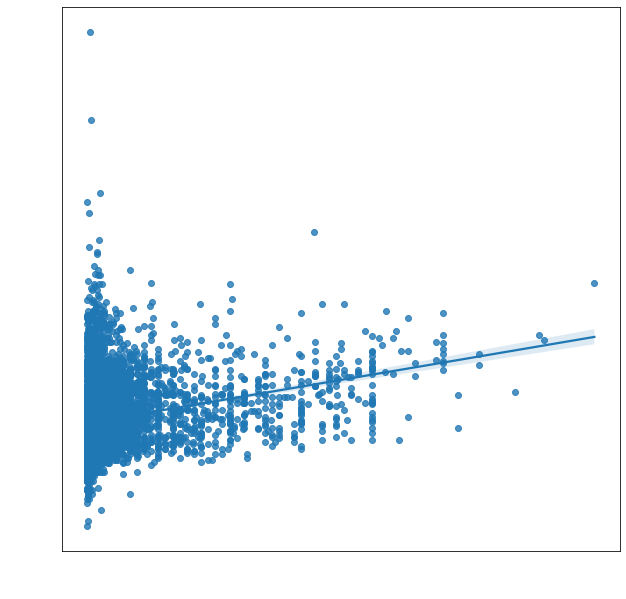

In [38]:
plt.figure(figsize=(10, 10))
sns.regplot(y="runtime", x="budget", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim có quan hệ với chi phí đầu tư vào phim khi ta thấy rằng:
- Phim với sự đầu tư càng lớn thì thời lượng càng cao: Đòi hỏi chi phí cho các phân cảnh quay, hậu kì nhiều hơn.
- Phương sai (runtime) của phim với chi phí thấp thì cao và giảm dần khi chi phí tăng.

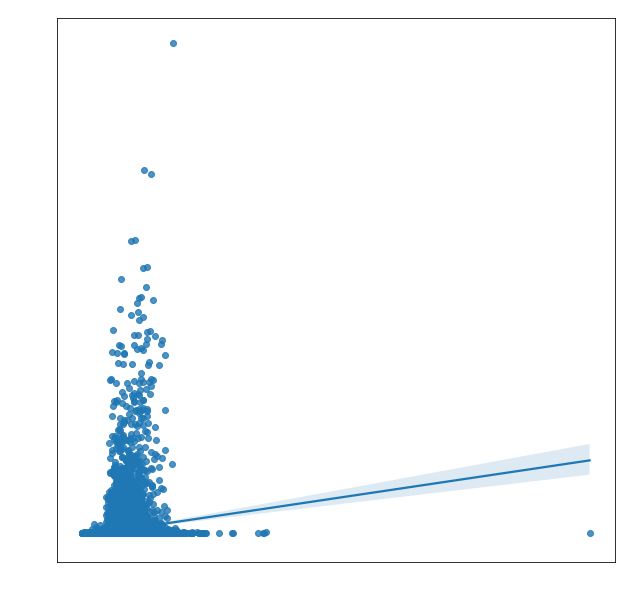

In [39]:
plt.figure(figsize=(10, 10)) 
sns.regplot(y="gross_worldwide", x="runtime", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [40]:
df.corr()['gross_worldwide']['runtime']

0.13109052508076918

=> Gần như không có sự tương quan

## Budget
https://www.xe.com/currencyconverter/

Regplot

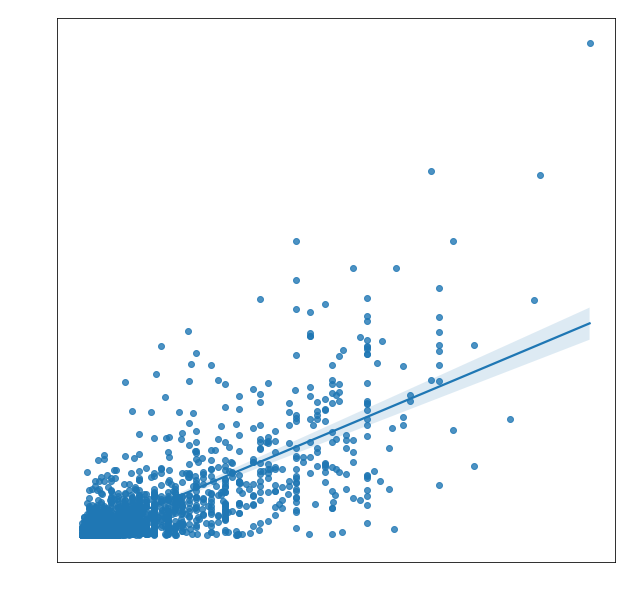

In [41]:
plt.figure(figsize=(10, 10))
sns.regplot(x="budget", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Đồ thi cho thấy tương quan giữa budget và gross_worldwide là lớn. Ta đi tính correlation giữa 2 thuộc tính.

In [42]:
df.corr()['gross_worldwide']['budget']

0.8016273900516061

Kết quả trả về là 0.8016273900516061. Đây là mức tương quan đồng thuận mạnh đúng như dự đoán.

## Aspect Ratio

Số lượng loại

In [43]:
df['aspect_ratio'].value_counts().shape[0]

53

In [44]:
df['aspect_ratio'].value_counts()

2.35:1         5798
1.85:1         2797
2.39:1         1595
1.78:1          816
1.66:1          101
1.33:1           72
2.00:1           53
1.37:1           39
2.40:1           23
2:1              22
2.66:1           22
2.20:1           16
1.90:1           14
2.55:1            8
2.4:1             7
1.50:1            5
2.76:1            5
2:39              5
1:1               4
1.55:1            4
cinemascope       3
2.11:1            2
1.89:1            2
2.25:1            2
3:1               2
2.10:1            2
2.41:1            1
1.95:1            1
1.77:1            1
1:66              1
2.37:1            1
1.61:1            1
circular          1
1.00:1            1
1.56:1            1
2.22:1            1
1.20:1            1
2.2:1             1
tondoscope        1
2.16:1            1
1:1.85            1
2.21:1            1
3.66:1            1
1.40:1            1
2.38:1            1
3.2:1             1
2.77:1            1
2.80:1            1
2.12:1            1
1.90.1            1


circular

In [45]:
df[df.aspect_ratio=='circular']['title']

16091    Wo bu shi Pan Jin Lian
Name: title, dtype: object

https://www.imdb.com/title/tt5918090/mediaindex/?ref_=tt_mi_sm

tondoscope

In [46]:
df[df.aspect_ratio=='tondoscope'][['title', 'countries_of_origin']]


title countries_of_origin
5671  Lucifer     Mexico,Belgium,

https://www.imdb.com/title/tt4131206/mediaindex/?ref_=tt_mi_sm

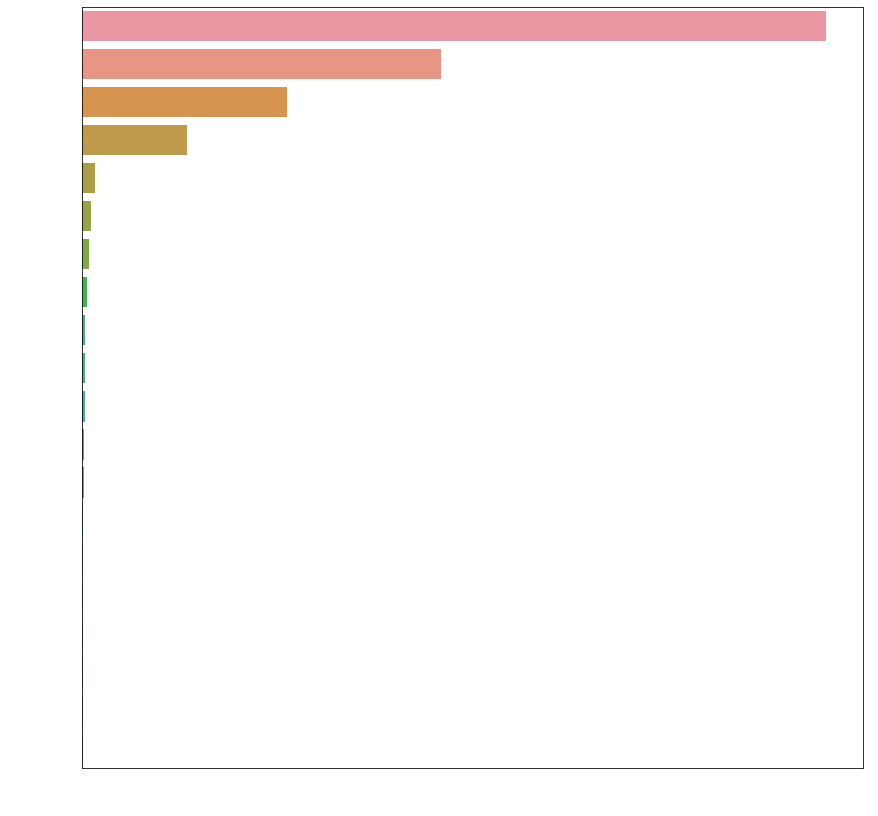

In [47]:
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('AR', fontsize=15) 
sns.countplot(y="aspect_ratio",data=df, order=df.aspect_ratio.value_counts().index[0:20])
plt.show()

Regplot

In [48]:
def ar_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Country', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["aspect_ratio"],
                showfliers=showFliers, order=df.aspect_ratio.value_counts().index[0:20])
    plt.show()
    
interact(ar_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim sử dụng tỷ lệ khung hình là 2.55

In [49]:
df[df.aspect_ratio == '2.55:1'][['title', 'gross_worldwide']]

title  gross_worldwide
208                    La La Land      448906865.0
5185                Hou hui wu qi      100125957.0
18685  Feng kuang de wai xing ren      327598891.0
18971               My Father Die           4252.0
20176           Fei chi ren sheng      255863112.0
21439             Liu lang di qiu      699992512.0
21976     Aimer, boire et chanter        2423379.0
22038                    Viktoria          11314.0

## Score

Phân bố 

In [50]:
def score_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.score,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Score', fontsize=15)
    plt.show()



interact(score_box_plot, showFliers=[True, False])
pass

interactive(children=(Dropdown(description='showFliers', options=(True, False), value=True), Output()), _dom_c…

Regplot

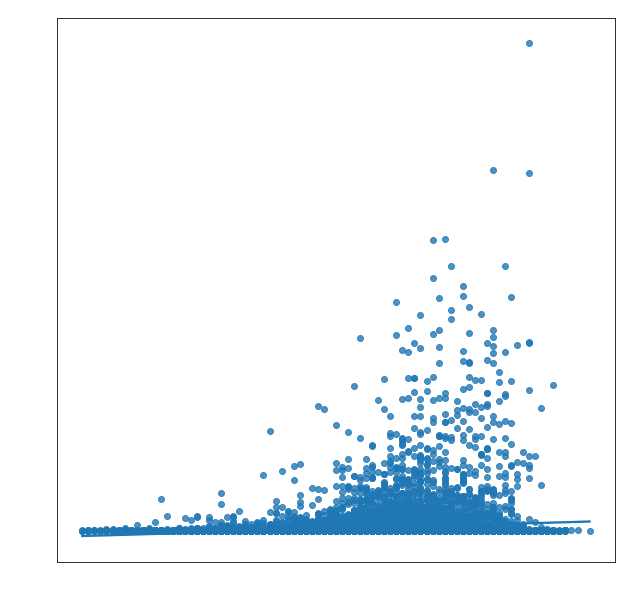

In [51]:
plt.figure(figsize=(10, 10))
sns.regplot(x="score", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [52]:
df.corr()['gross_worldwide']['score']

0.1296968109051146

## Votes (nghìn người)

In [53]:
def vote_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.votes,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Votes', fontsize=15)
    plt.show()



interact(vote_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có số điểm đánh giá cao nhất

In [54]:
df[df.score == df.score.max()]

title                                   casts  \
3643  Amudhan aka Sinamkol  Aravindhan,Sinthar Athith,Leelawathy,,   

            directors         writers  genres certificate  release_date  \
3643  Ranjith Joseph,  Theepachelvan,  Drama,         NaN        2020.0   

     countries_of_origin languages                    production_companies  \
3643    India,Sri Lanka,    Tamil,  Bakialakhmi Talkies,Skymagic Pictures,   

      ...  budget  runtime  color sound_mix aspect_ratio score  votes  \
3643  ...     NaN    121.0  Color      DTS,          NaN   9.4  0.059   

      user_reviews  critic_reviews  metascore  
3643           3.0             2.0        NaN  

[1 rows x 21 columns]

Regplot

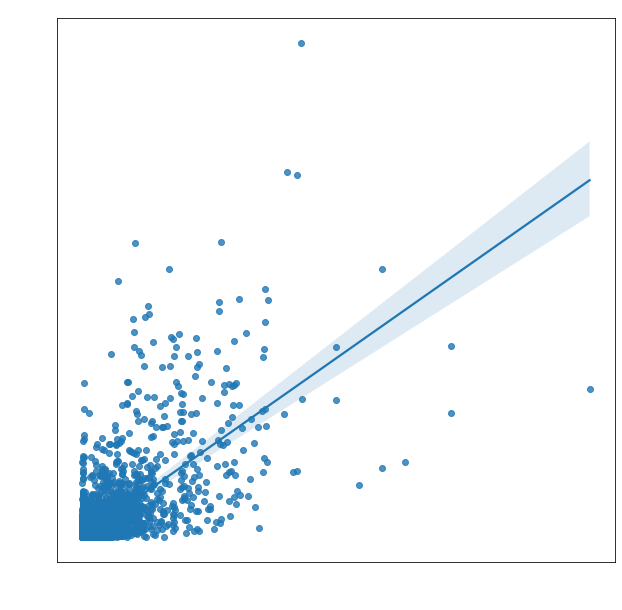

In [55]:
plt.figure(figsize=(10, 10))
sns.regplot(x="votes", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Votes', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [56]:
df.corr()['gross_worldwide']['votes']

0.7231502613872525

## User reviews (người)

Phân bố

In [57]:
def ur_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.user_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('user_reviews', fontsize=15)
    plt.show()



interact(ur_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có lượt đánh giá nhiều nhất

In [58]:
df[df.user_reviews == df.user_reviews.max()]

title                                         casts       directors  \
11  Joker  Joaquin Phoenix,Robert De Niro,Zazie Beetz,,  Todd Phillips,   

                                  writers                 genres certificate  \
11  Todd Phillips,Scott Silver,Bob Kane,,  Crime,Drama,Thriller,         C13   

    release_date    countries_of_origin languages  \
11        2019.0  United States,Canada,  English,   

                                 production_companies  ...      budget  \
11  Warner Bros.,Village Roadshow Pictures,Village...  ...  55000000.0   

    runtime  color                                sound_mix aspect_ratio  \
11    122.0  Color  SDDS,Dolby Atmos,Datasat,Dolby Digital,       1.85:1   

   score   votes  user_reviews  critic_reviews  metascore  
11   8.4  1100.0       11100.0           743.0       59.0  

[1 rows x 21 columns]

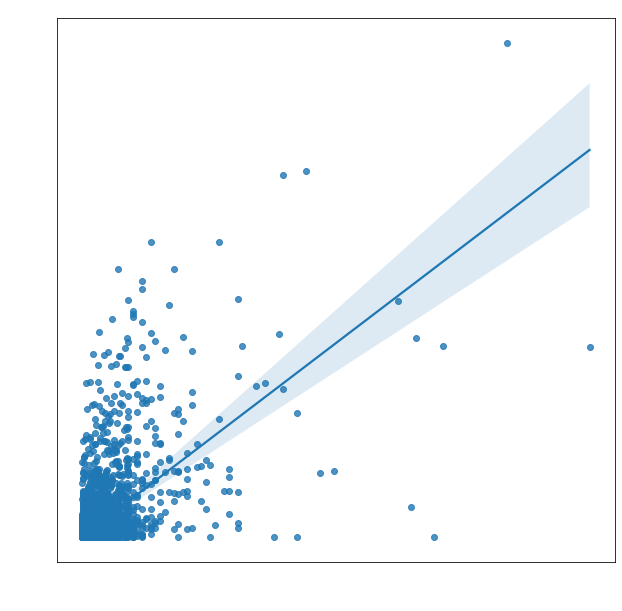

In [59]:
plt.figure(figsize=(10, 10))
sns.regplot(x="user_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('user_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [60]:
df.corr()['gross_worldwide']['user_reviews']

0.6243259050915766

## Critic Reviews (người)

In [61]:
def cr_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.critic_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('critic_reviews', fontsize=15)
    plt.show()



interact(cr_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Regplot

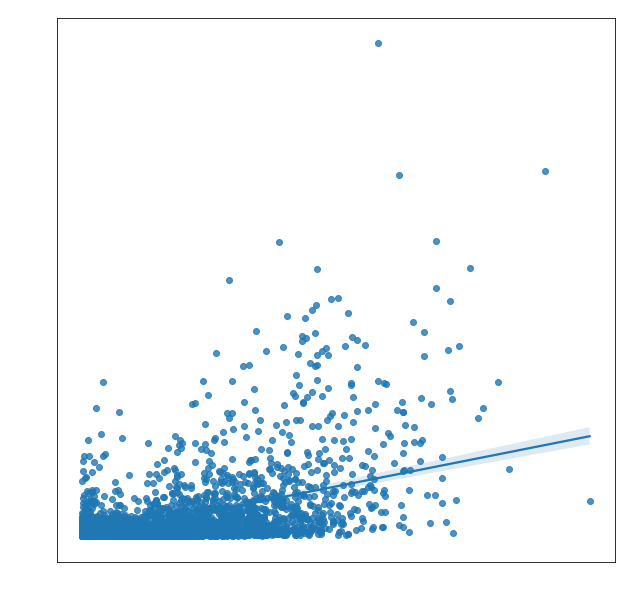

In [62]:
plt.figure(figsize=(10, 10))
sns.regplot(x="critic_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('critic_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [63]:
df.corr()['gross_worldwide']['critic_reviews']

0.5919838787693862

## Color

Số lượng

In [64]:
df.color.value_counts()

Color              19999
Black and White      174
Name: color, dtype: int64

Phân bố

In [65]:
def cl_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Color', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["color"],
                showfliers=showFliers)
    plt.show()
    
interact(cl_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có màu có doanh thu phân bố cao hơn

## Sound mix

In [66]:
soundMix = getList('sound_mix')
print(f'Gồm {len(soundMix)}')
for stt, cast in zip(range(0, len(soundMix)), soundMix):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 40
1  Dolby Atmos
2  Sensurround
3  Dolby SR
4  D-Cinema 48kHz 7.1
5  Ultra Stereo
6  Auro 9.1
7  Datasat
8  DTS-ES
9  Sonics-DDP
10 DTS 70 mm
11 D-Cinema 96kHz 7.1
12 DTS
13 D-Cinema 96kHz 5.1
14 Dolby Surround 5.1
15 Aurofone
16 70 mm 6-Track
17 Dolby Surround 7.1
18 DTS:X
19 Dolby Digital
20 SDDS
21 Dolby Stereo
22 Auro 11.1
23 Stereo
24 WANOS
25 Cinesound
26 Mono
27 DTS-Stereo
28 HoloSound
29 D-Cinema 48kHz 5.1
30 D-Cinema 48kHz Dolby Surround 7.1
31 6-Track Stereo
32 Dolby
33 Dolby Digital(original version)
34 Dolby Digital EX
35 AGA Sound System
36 D-Cinema 96kHz Dolby Surround 7.1
37 IMAX 6-Track
38 12-Track Digital Sound
39 Soundelux
40 Silent


Dolby                                5799
Dolby Digital                        4809
Dolby Atmos                          1020
SDDS                                  705
Datasat                               641
Dolby Surround 7.1                    566
DTS                                   404
Stereo                                344
Auro 11.1                             215
D-Cinema 48kHz 5.1                    165
Dolby SR                              156
IMAX 6-Track                           88
Sonics-DDP                             65
12-Track Digital Sound                 47
Dolby Digital EX                       44
D-Cinema 96kHz 5.1                     14
6-Track Stereo                         10
DTS-ES                                 10
Dolby Stereo                            8
Mono                                    8
WANOS                                   6
DTS-Stereo                              6
D-Cinema 48kHz 7.1                      5
DTS:X                             

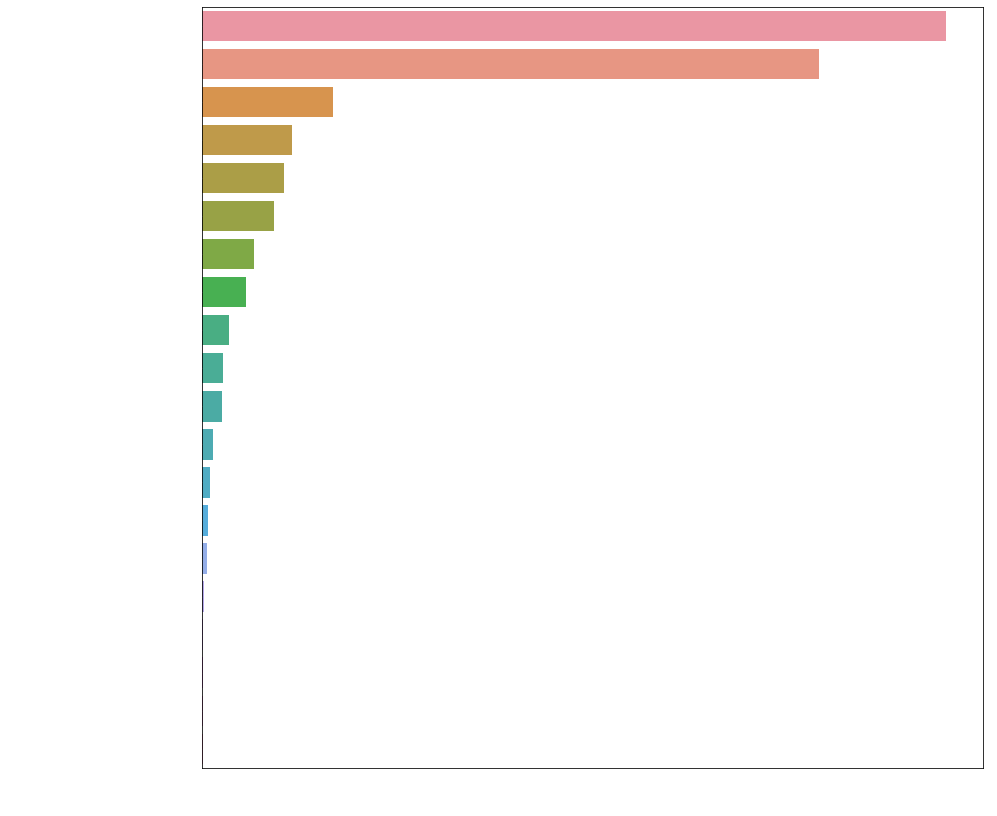

In [67]:
dataSM = []
for sm in soundMix:
    for line in df[df.sound_mix.str.contains(sm, na=False)].values:
        dataSM.append((line[0], sm, line[10], line[6], line[16]))  
dataSM = pd.DataFrame(data=dataSM, columns=['title', 'sound_mix', 'gross', 'year', 'score'])
print(dataSM.sound_mix.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="sound_mix",data=dataSM, order=dataSM.sound_mix.value_counts().index[0:20])
plt.ylabel('Sound Mix', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

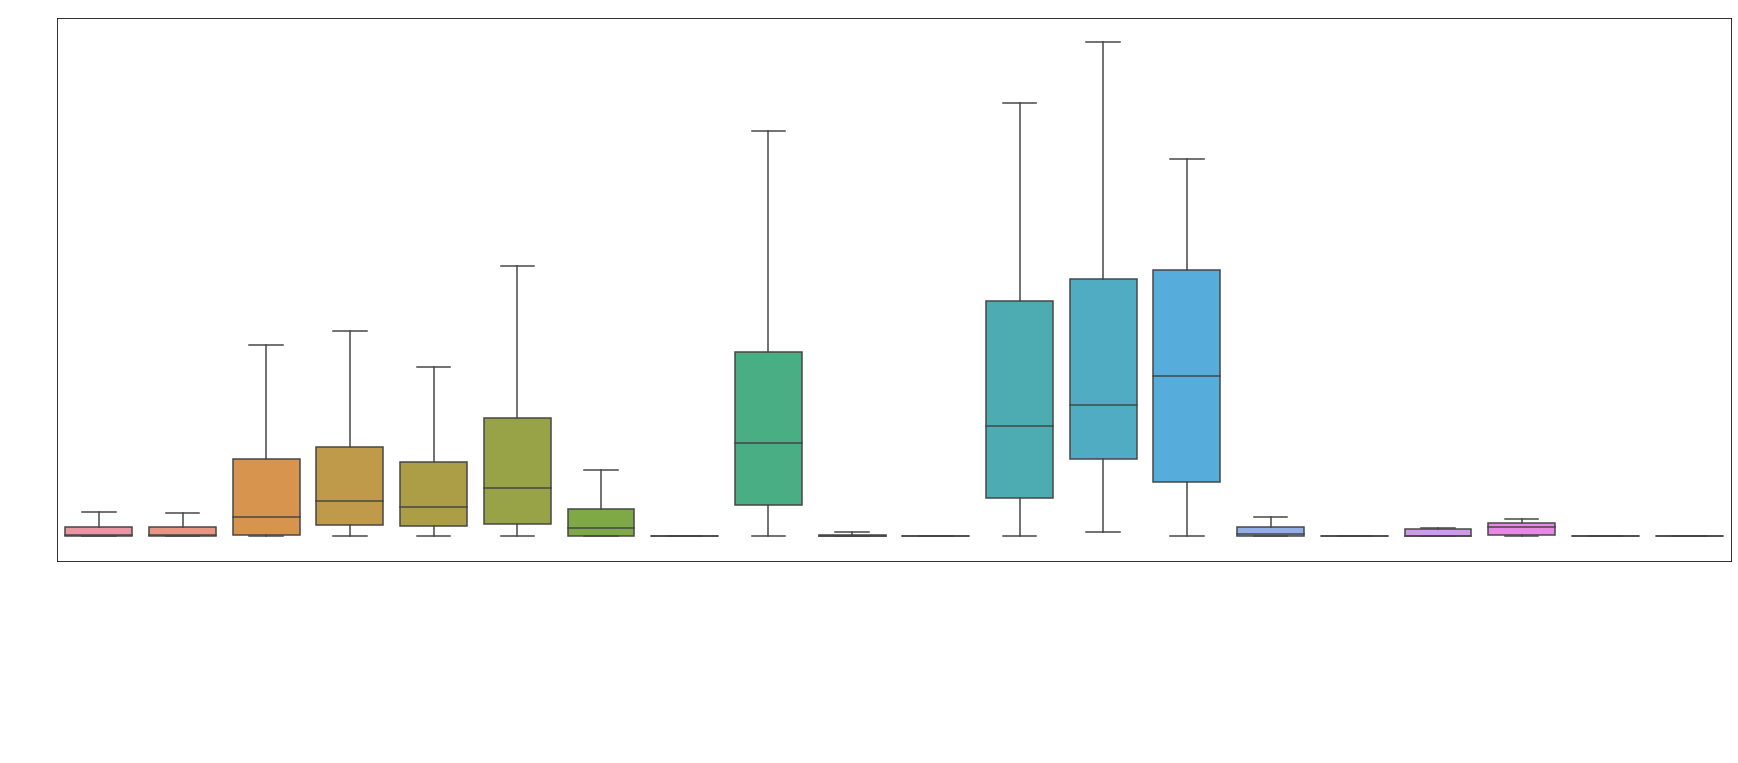

In [68]:
plt.figure(figsize=(30, 10))
sns.boxplot(y=dataSM["gross"], x=dataSM["sound_mix"],
            showfliers=False, order=dataSM.sound_mix.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Sound Mix', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

## Production_companies

In [69]:
df.production_companies.sample(1)

2429    20th Century Fox Brazil,CINE Cinematográfica,E...
Name: production_companies, dtype: object

In [70]:
comList = getList('production_companies') 
print(f'Gồm {len(comList)}')
for stt, cast in zip(range(0, len(comList)), comList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 16858
1  Hong Kong Arts Development Council
2  Genoma Films
3  My Own Worst Enemy
4  Clear Pictures Entertainment
5  Makasfilm
6  Alfresco Enterprises
7  Black Flag
8  3QU Media
9  CCCP
10 Sky Dancers
11 Hidden Rooster Films
12 Fox International Productions (FIP)
13 Welela Studios
14 Tax Shelter du Gouvernement Fédéral Belge
15 Tripod Entertainment
16 Blue Haze Entertainment
17 Freeway Pictures
18 M.A.R.K.13(TM)
19 Hook Brothers
20 Beijing United Power Films
21 Centre National de la Cinématographie (CNC)
22 Soul Rebel Entertainment
23 Amarath Arc
24 Panorâmica
25 EOS Entertainment
26 Cinar Film Yapim
27 Seagull
28 Albino Fawn Productions
29 Asya Film
30 Neddy Dean Productions
31 Production Media Group
32 Oasis Motion Pictures
33 Butimar Productions
34 LC Barreto Productions
35 Agua Films
36 Savage Productions
37 A Film Company Ram
38 Red Rover Films
39 Talentilicious
40 LA Studio
41 Opus Pictures
42 Random Art Workshop
43 Meguru Production
44 Beautiful Bay Entertainment
45 Varsovia

2827 Blue Dream Studios Spain
2828 Box Productions
2829 Inkas Film & T.V. Productions
2830 Demarsh-Film
2831 Iki Film
2832 Bemar
2833 JK Film
2834 Indican Pictures
2835 New Life Cinema
2836 Plus Productions
2837 Django Film
2838 Vishal Bhardwaj Films
2839 DDP Studios
2840 Senn
2841 Boréales
2842 Warsaw Pact Films
2843 Hairun Pictures Co.
2844 G.F.C. Development
2845 Canibal Networks
2846 Neher Prodüksiyon
2847 Millennium Films
2848 Kiwoon Investment
2849 Court Five
2850 Salamandra Films
2851 Chaocorp
2852 Cinema Veritas
2853 Elkano Dibulitoon AIE
2854 Cinezoo
2855 Gakhal Bros. Entertainment
2856 Skylight Films
2857 Madeleine Films
2858 Notting Hill Films
2859 Handmade Films
2860 Six Sigma Plus
2861 José Frade Producciones Cinematográficas S.A.
2862 Babylon'13
2863 Swirl Films
2864 Silent Movies
2865 Kärnfilm
2866 I'm FILM
2867 Orange Sky Golden Harvest Entertainment
2868 Naratyvas
2869 Instinctive Film
2870 Geet Mp3
2871 Dan Films
2872 Liberty Road Entertainment
2873 Film Constellation

5327 Eesti Joonisfilm
5328 Alpha Hollywood Studios
5329 Mater Spei
5330 Chez Georges Productions
5331 Magic Light Pictures
5332 Portal Pictures
5333 Banca Popolare di Vicenza
5334 Television Broadcasts Limited (TVB)
5335 Orange
5336 Alba Produzioni
5337 Boxspring Entertainment
5338 Komplizen Film
5339 Omnilab Media
5340 The Filipino Channel
5341 EBT Yapim
5342 EBH Polska
5343 Serie B S.L.
5344 Full House
5345 Requestbest
5346 Chongqing Film Group
5347 American Film Productions
5348 Akanga Film Productions
5349 Snowfall Films
5350 L'Age d'or Production
5351 Merrymeet Films
5352 MV Produções
5353 erbp
5354 Ucqar Film
5355 Hatalom
5356 Izaan Pictures
5357 20th Century Fox Entertainment
5358 Schattenkante
5359 Kt/Kino
5360 Pierre Grise Productions
5361 Paper Trail
5362 Joyful Founder
5363 Cinémage 6
5364 Derivas Films
5365 Dice Film
5366 Filmoda
5367 Off the Chart Entertainment
5368 Factor RH Producciones
5369 Film Incito
5370 NN Films
5371 Boneyard Entertainment China
5372 Frame By Frame 

8103 Bridge Production
8104 Leopardo Filmes
8105 Beijing Yixiang Tiankai Media
8106 Rainbow S.p.A.
8107 Faith Warrior Productions
8108 Bulb Chamka
8109 Shanghai Jiaze Film Culture Studio
8110 Elia Films
8111  Film and Television Culture
8112 Filmkompaniet MadMonkey
8113 Sonia Friedman Productions
8114 Digital 104
8115 Beijing Deyunshe Culture Diffusion
8116 Memfis Film
8117 Ghoulardi Film Company
8118 British Film Institute (BFI)
8119 Just Film Distribution
8120 Continental Producciones
8121 Tbos Film
8122 999 Entertainments
8123 DiNovi Pictures
8124 La Cuarta Productions
8125 Three Dots Entertainment Company
8126 Motion Group Pictures
8127 Producciones X Marca
8128 Ankle Sock & Baseball Pants
8129 Media Park
8130 Picante Films
8131 Kamara
8132 Salvador Rocha y Asociados S.C.
8133 Formata Produções
8134 IQ Production
8135 Family Pictures Film
8136 L. G. M. Ellegiemme
8137 Divali Films
8138 Équation
8139 Arya Films
8140 Venice Film
8141 Ambient Entertainment GmbH
8142 Phoenix Pictures
8

10826 MINT
10827 Faith in Motion Productions
10828 Leopard Films
10829 Dundee Entertainment
10830 Sofica Manon 9
10831 Lee Daniels Entertainment
10832 Arthur Cohn Productions
10833 Zonbo Media
10834 Peyote Films
10835 Forrest Films
10836  Entertainment
10837 Film Commission Regione Campania
10838 AXN
10839 Illuminations Films
10840 BB Film Productions
10841 TRIMAFILM
10842 Crime Scene Pictures
10843 Williams Street
10844 Année Zéro
10845 Luz y Sonidos
10846 Kondrat-Media
10847 802 AD Productions
10848 The Cantillon Company
10849 Fuji Animation Studio
10850 Sputnik
10851 Taska Film
10852 Cromosoma TV produccions
10853 Le Grand Films
10854 Gaylene Preston Productions
10855 Mr. Monkey
10856 Medyavizyon
10857 Tremendum Pictures
10858 Alpha-Omega Productions
10859 Kinorama
10860 Overbrook Entertainment
10861 Mantar Film
10862 Tonga Talkies
10863 Oak Entertainments
10864 M3 Alliance Limited
10865 AVROTROS
10866 Saga-Productions
10867 Silver Grain Productions
10868 Trans-Radial Pictures
10869

13825 Tarek El'eryan
13826 Facciapiatta
13827 SuperBloom Films
13828 Gas Station 8
13829 Estuary Films
13830 Caviar
13831 Story Posse
13832 A Company Filmproduktionsgesellschaft
13833 Next Generation Pictures
13834 Katholieke Radio Omroep (KRO)
13835 SOIXAN7E QUIN5E
13836 Rice Films
13837 Expediente La Película A.I.E.
13838 HBO Romania
13839 Beijing E Xi E Entertainment Production
13840 Rescued Films
13841 Glass Slipper Live Events - Event 1
13842 LSD Audio
13843 Dago García Producciones
13844 Andac Film Productions
13845 Lord Entertainment Group (LEG)
13846 Irony Production
13847 Amrion
13848 Borderline Presents
13849 UAB ACME Film
13850 Online Cookie Collective
13851 Moriarti Produkzioak
13852 Kyoraku Industrial Holdings
13853 Limage Media Group
13854 Pretty Matches Productions
13855 Legacy Pictures (II)
13856 YQstudio LLC
13857 3Blackdot
13858 Sin Perdon de Dios
13859 Up A Notch Productions
13860 Eiga Ni no Kuni Seisaku Iinkai
13861 Salta la Liebre
13862 Nuclear Productions
13863 Oz

16809 Les Films Alyne
16810 Maniak Film
16811 Maruti Pictures
16812 Forward Movement
16813 Minika
16814 Zhengfu Pictures
16815 White Hill Studios
16816 Centropolis Entertainment
16817 Webstar Channel
16818 Finzioni Cinematografiche
16819 Medya Muhendisi
16820 Indiestory Incorporation
16821 Raintree Pictures
16822 TR 40 33 Productions
16823 Escape Films
16824 Sonet Entertainment
16825 Crafted Films
16826 Capriol Films
16827 Instituto Mexicano de Cinematografía (IMCINE)
16828 MD4
16829 Frame100r
16830 Mahi Films
16831 CRC
16832 La Filmerie
16833 Creativity Capital
16834 Hangzhou Municipal Government
16835 Rozwój Film Production
16836 China Movie Channel SARFT
16837 Estudio Mariscal
16838 Société des Producteurs de Cinéma et de Télévision (Procirep)
16839 Proafilme
16840 Marvel Studios
16841 Werc Werk Works
16842 Picture Movers Anonymous
16843 Storykey
16844 China Film
16845 Geopoly Film
16846 Tresmilmundos Cine
16847 Blinder Films
16848 30WEST
16849 Finecut Co.
16850 LBI Productions
1685

## Cast

In [71]:
df.casts.sample(1)

17167    Ariela Barer,Annalise Basso,Ryan Simpkins,,
Name: casts, dtype: object

In [72]:
castList = getList('casts')
print(f'Gồm {len(castList)} diễn viên')
for stt, cast in zip(range(0, len(castList)), castList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 32767 diễn viên
1  François Deblock
2  Rolanda Marais
3  Dennis Haskins
4  hao-Wen Hao
5  Nadezhda Goncharova
6  Lee Dong-Wook
7  Ceyhun Fersoy
8  Mel Maia
9  Derek Cecil
10 Hafþór Júlíus Björnsson
11 Vithaya Pansringarm
12 Héloïse Dugas
13 Liv Glaser
14 Chris Rock
15 Arjan Ederveen
16 Xu Ran
17 Michaela Watkins
18 Olunike Adeliyi
19 Laura Espejo
20 Subbaraju
21 Steve Lantz
22 Ravi Kishan
23 Buster Isitt
24 makab Omar
25 Andrey Fomin
26 Andre Myers
27 Marcos Veras
28 Matt Capiccioni
29 Manuel Vicente
30 Atmen Kelif
31 Pat Mills
32 Josefine Preuß
33 Van Phuong
34 Chin-Jung Kang
35 Tobi B.
36 hin'nosuke Abe
37 János Kulka
38 Sun-young Ryu
39 Jeong-hwan Kong
40 Bronislav Kotis
41 Ricardo Chavira
42 Soon-jae Lee
43 Gilbert Melki
44 Lieke-Rosa Altink
45 Manu Rishi Chadha
46 Andrés Salas
47 Marion Ross
48 Felix Briegel
49 Artit Wiboonpanitch
50 Cree Kelly
51 Serdar Atacan
52 Esmée van Kampen
53 Namrata Shrestha
54 Gisela Ponce de León
55 Sagar Kale
56 Brighton Sharbino
57 Cung Le
58 Jess

1951 Jeremy Irvine
1952 Nina Melo
1953 Yun Jeong-hie
1954 Konstantin Adaev
1955 Danny Kwok-Kwan Chan
1956 Lukás Vaculík
1957 Leighton Meester
1958 Nandamuri Balakrishna
1959 Nicolás Abeles
1960 Florence Loiret Caille
1961 Juan Calviño
1962 Rita Corrado
1963 Nicoletta Romanoff
1964 Yiddá Eslava
1965 Giulio Brogi
1966 Hulya Caliskan
1967 Ernad Prnjavorac
1968 Aleksey Faddeev
1969 Sarp Apak
1970 Secun de la Rosa
1971 Dorothy Adams
1972 Ismail Alhassan
1973 Liz Mikel
1974 Jason Lee
1975 Eleonora Gaggero
1976 Logan Lerman
1977 Jada Pinkett Smith
1978 Nejat Isler
1979 Mauricio Figueroa
1980 Hamilton Wessels
1981 Bertille Chabert
1982 Asia Argento
1983 Ahmad Abdulwahed
1984 Tom Russell
1985 Nando Paone
1986 Silvia D'Amico
1987 Zawe Ashton
1988 Arved Friese
1989 Truong Giang
1990 Viviana Saccone
1991 iouzana Melikian
1992 Chico Anysio
1993 Elsabe Zietsman
1994 Jess Molho
1995 Ahmet Beyduz
1996 Pierre Niney
1997 Bruna Cusí
1998 Kagiso Lediga
1999 Owen Vaccaro
2000 Choi Ji-Hyeon
2001 Chris Minor

3387 Pablo Cedrón
3388 Sanya Malhotra
3389 Doug E. Doug
3390 Dariel Arrechaga
3391 Mark Bogatyryov
3392 Kaho Minami
3393 Hannah R. Loyd
3394 Uccio De Santis
3395 Aleksandra Cwen
3396 Alkistis Pavlidou
3397 Columbus Short
3398 Ye-seul Han
3399 Nikita Mikhalkov
3400 Elle LaMont
3401 Yen-Jou Lin
3402 Shahed Ali
3403 Nicole Beharie
3404 ebastian Banes
3405 Ella Chen
3406 Nicolàs Stilman
3407 Natnischa Cerdchoobuphakaree
3408 Fred Melamed
3409 Peri Baumeister
3410 Edgar Garcia
3411 Dustin Semmelrogge
3412 Benjamín Amadeo
3413 Steven Berkoff
3414 Joachim Cruise
3415 Kamila Bujalska
3416 Ana Cecilia Natteri
3417 Ewa Zietek
3418 Irina Antonenko
3419 Nooh Al Hamadi
3420 Doron Amit
3421 Bernard Hill
3422 Sandra Faleiro
3423 Loretta Devine
3424 Manel Foulgoc
3425 Nicke Lignell
3426 Macarena Gómez
3427 hawn Dou
3428 Alun Armstrong
3429 Roberta Burns
3430 Osvaldo Bonet
3431 Marcelo Valle
3432 Joely Richardson
3433 Kara Tointon
3434 Darren Benschop
3435 Nandita Shwetha
3436 Hiroko Yakushimaru
3437 E

4950 Turabi Çamkiran
4951 Alejandro Riaño
4952 Bryce DiCristofalo
4953 Adèle Haenel
4954 Suzan Aksoy
4955 Tiffany Ceri
4956 Ashton Solecki
4957 Fantine Harduin
4958 Amber Bongard
4959 Yaël Abecassis
4960 Dustin Nguyen
4961 Connor Paolo
4962 Tao Tsuchiya
4963 Diana Mórová
4964 Aimee Stolte
4965 Vladimir Azhippo
4966 Alan Katic
4967 Ethan Jonckeere
4968 Yordan Danchev
4969 Jorge Masvidal
4970 Shigenori Yamazaki
4971 Violet McGraw
4972 Mark Hamill
4973 Omar Aranda
4974 Jacques Bonnaffé
4975 Ruslaan Mumtaz
4976 Teresita Commentz
4977 Tuna Kiremitçi
4978 Vijay Sethupathi
4979 Hugo Stone
4980 Jordan Knapp
4981 Tsurutarô Kataoka
4982 Francesco Pannofino
4983 Sam Rockwell
4984 Stiaan Smith
4985 Frédéric Beigbeder
4986 Hassan Mutlag Al-Maraiyeh
4987 Sara Petersen
4988 Priyanshu Painyuli
4989 Ying Huang
4990 Alejandro Speitzer
4991 Josh Adell
4992 Julia Hana
4993 Christina Hendricks
4994 Rossif Sutherland
4995 Morgan Davies
4996 Tuna Çevik
4997 Xijuan Zhu
4998 Loren Gray
4999 Matsutera Chiemi
50

6063 Ritwick Chakraborty
6064 John Schwab
6065 Ken'ichi Takitô
6066 Qing'an Ren
6067 Eddie Murphy
6068 Hande Katipoglu
6069 Corey Stoll
6070 Anna Starshenbaum
6071 Frano Maskovic
6072 Miklós Székely B.
6073 Brahim Asloum
6074 Christopher Von Uckermann
6075 Jonathan Stoddard
6076 Chris Sarandon
6077 Noo-Ri Bae
6078 Josh O'Connor
6079 Mimoun Oaïssa
6080 Edita Malovcic
6081 Evan Helmuth
6082 Ksenia Alekseeva
6083 Velimir 'Bata' Zivojinovic
6084 Sascha Merényi
6085 Thomas Ernst
6086 James Moses Black
6087 Natasha Yarovenko
6088 Elena Koreneva
6089 Vesna Cipcic
6090 Kanako Higuchi
6091 Kathleen Barr
6092 Luis Brandoni
6093 Tamer Alwerfalli
6094 Jackson Gutierrez
6095 Daizaburo Arakawa
6096 Yaashika Aanand
6097 Djuangjai Hirunsri
6098 Csengelle Nagy
6099 Ana Ularu
6100 Amber Kuo
6101 Gard B. Eidsvold
6102 Chino Darín
6103 Jenny Moore
6104 Vladimir Seleznyov
6105 Wufu Wang
6106 Rasmus Lind Rubin
6107 Martijn Fischer
6108 Maria Cantillo
6109 Roberto Infascelli
6110 Dennis Boutsikaris
6111 eo Y

7949 Jerónimo Toubes
7950 Zejhun Demirov
7951 Nils Verkooijen
7952 Yuki Matsushita
7953 David Furlan
7954 Ravi Teja
7955 Carles Arquimbau
7956 Tenji Kamogawa
7957 Jae-hun Tak
7958 Andrés Couturier
7959 Antonio Garrido
7960 Samuel Jakob
7961 Mehmet Avci
7962 Daniel Giménez Cacho
7963 Travis Cluff
7964 Michel Blanc
7965 Àlex Monner
7966 Letícia Sabatella
7967 Elena Podkaminskaya
7968 Camille Balsamo
7969 Mykola Bereza
7970 M. Ali Nazarian
7971 Ellis van den Brink
7972 Steven Seagal
7973 Sujith Raj Kochukunju
7974 Senta Berger
7975 Raphael von Bargen
7976 Eugenia Tempesta
7977 Nuray Yesilaraz
7978 Hsiao-chuan Chang
7979 Roy Billing
7980 Nicolai Cleve Broch
7981 Jaturong Mokjok
7982 Eric Keenleyside
7983 Gustav Borreman
7984 Sayed Ahmad
7985 Stephen Bishop
7986 Irene Vetere
7987 Ivan Urgant
7988 Jáchym Dimov
7989 Aleksandr Bashirov
7990 Ali Fikry
7991 Hongwei Gao
7992 Hani Adel
7993 Marina Foïs
7994 Priyanka Sharma
7995 Aravindhan
7996 Paopetch Charoensook
7997 Jesús Bonilla
7998 Ioan Gruf

8949 Ge Hu
8950 Caiyu Yang
8951 Alejandra Barros
8952 Jennifer Yu
8953 Bashar Al-Shatti
8954 eann William Scott
8955 Licia Nunez
8956 Shabana Azmi
8957 Aleksandr Abdulov
8958 Patrizia Bollini
8959 Billy Birmingham
8960 Bronislawa Zamachowska
8961 Derek de Lint
8962 Senol Mat
8963 Tania
8964 Alejandra Lara
8965 Tomori Abe
8966 Na-ra Lee
8967 Kevin Zegers
8968 Demet Özdemir
8969 Sasapin Siriwanji
8970 Mian Jiang
8971 Hugo Armstrong
8972 Magdalena Cielecka
8973 Kasiel Noah Asher
8974 Ming Hu
8975 Kedar Williams-Stirling
8976 Maximilian Scheidt
8977 Isaach De Bankolé
8978 Oliver Methling Søndergaard
8979 Katie Gill
8980 ôsuke Ikematsu
8981 Hyper Aadi
8982 Gabriela Calun
8983 Daniel Craig
8984 Ninh Duong Lan Ngoc
8985 Carla Crespo
8986 Brasse Brännström
8987 Jeanne Disson
8988 Mikhail Fedorchenko
8989 Katla M. Þorgeirsdóttir
8990 Marit Synnøve Berg
8991 Franck Dubosc
8992 Telma Huld Jóhannesdóttir
8993 Olga Simonova
8994 Humberto De Vargas
8995 Jake Allyn
8996 Eun-Seong Jeong
8997 Luke Grim

10948 Mariona Tena
10949 Angela Lansbury
10950 Eva Oskarsdottir
10951 Alice de Lencquesaing
10952 Giacomo Zulian
10953 Mafalda Carbonell
10954 Elena Kizilova
10955 Irina Pegova
10956 Hareesh Kanaran
10957 Yûdai Chiba
10958 Osman Sonant
10959 Yasmin Raeis
10960 Danielle Panabaker
10961 Ilker Ayrik
10962 Václav Vydra
10963 Clément Roussier
10964 Dânia Neto
10965 Matteo Corradini
10966 Jingwen E.
10967 Bryn Vale
10968 Katie McGrath
10969 Dusan Kaprálik
10970 Lorraine Toussaint
10971 Yûko Takeuchi
10972 Govind Namdeo
10973 Hayk Sargsyan
10974 Francisco Quintana
10975 Petar Fradelic
10976 Yoyo
10977 Adam Sinclair
10978 Dakota Fanning
10979 Miklós Bányai
10980 Jesper Asholt
10981 Nico Sturm
10982 David Zellner
10983 Laura Cepeda
10984 Ana Ángeles García
10985 Karin Lithman
10986 Irina Nizina
10987 Anders Hvidegaard
10988 Aditi Sudhir Pohankar
10989 Ntare Guma Mbaho Mwine
10990 Dinh Y Nhung
10991 Maya Zapata
10992 Katia Condos
10993 Karidja Touré
10994 Alan Shearman
10995 Parvesh Cheena
10996

11948 Yalitza Aparicio
11949 Mao Daichi
11950 Jenna Coleman
11951 Belinda Effah
11952 Ga-in Son
11953 Oleksandr Reshetilov
11954 Illuminati Dance Crew
11955 Miyu Andô
11956 Deon Lotz
11957 Airi Taira
11958 Doris Hick
11959 Peter Dalle
11960 Nazeeh Tarsha
11961 Terrence Jenkins
11962 Sarah Ovens
11963 Foued Nabba
11964 Goran Jevtic
11965 Halima Karaouane
11966 Mélissa Désormeaux-Poulin
11967 Devon Jordan
11968 Malhar Thakar
11969 Ashley Tisdale
11970 Baptiste Lalieu
11971 Meg Imperial
11972 Gergo Rabakozi
11973 Sivuyile Ngesi
11974 Gülçin Tunçok
11975 Noritake Kinashi
11976 Bengal
11977 Nicole LaLiberte
11978 Kenta Arima
11979 Leo Vertunni
11980 Rahimah Rahim
11981 Ricky Adelayitor
11982 Samyuktha Menon
11983 Hee-soo Kim
11984 Marika Costabile
11985 Fulya Zenginer
11986 Ryan Steele
11987 Jana Krausová
11988 Guillermo Francella
11989 Karl Knaup
11990 Luiza-Gabriela Brovina
11991 Marike Folles
11992 Siobhan Reilly
11993 Dino Andrade
11994 Cao Feiran
11995 Marc Duret
11996 David Duchovny
1

13947 José Arley de Jesús Carvallido Lobo
13948 Konstantin Khabenskiy
13949 Teymûr Evdikê
13950 Majelo Quiroz
13951 Yuet Chin
13952 Charlie Day
13953 Dimitri Durdaine
13954 Tomi Alatalo
13955 Elizabeth Roberts
13956 Clay Walker
13957 Andriy Lidagovskiy
13958 Tom Blyth
13959 Jack Mullins
13960 Héctor Bonilla
13961 Jean Noel Martin
13962 Bogdan Farcas
13963 Elettra Dallimore Mallaby
13964 Susan Ziegler
13965 herwan Haji
13966 Neil Flynn
13967 Ben Li
13968 Eileen O'Higgins
13969 Kaori Ishihara
13970 Nansi Agha
13971 Yulin Lu
13972 Marlon Moreno
13973 Gang Chen
13974 Prabh Grewal
13975 Bartek Kasprzykowski
13976 Mi Yang
13977 Emelise Aleandri
13978 Ha Jung-woo
13979 Jessica Dinnage
13980 Joe Koener
13981 Semsa Mujic
13982 Emmanuele Aita
13983 Asya Domskaya
13984 Albert Pretorius
13985 Anna Nehrebecka
13986 Nicolás Barsoff
13987 Linus Roache
13988 Kazuhisa Kawahara
13989 Longzheng Wang
13990 Ito Ono
13991 Kristýna Boková
13992 Jana Bjelica
13993 Takuma Terashima
13994 Roberto Suárez
13995 M

14947 Yang Ou
14948 Estelle Parsons
14949 José Carlos Femat
14950 Jozef Vajda
14951 Borja Espinosa
14952 Daria Lorenci
14953 Roos Van Vlaenderen
14954 Robert Stadlober
14955 Atharvaa Murali
14956 eong-guk Choi
14957 Adolfo Alvarez
14958 Harrdy Sandhu
14959 Steve Wall
14960 Ugur Yücel
14961 Lynsey Taylor Mackay
14962 Cornelius Obonya
14963 Agathe Schlenker
14964 Miroslav Karel
14965 Adrienne Branz
14966 Britani Bateman Underwood
14967 Laura Gabrielle
14968 Kate Winslet
14969 Alicia Rodríguez
14970 Brandon López
14971 Manolo Herrera
14972 Roosmarijn van der Hoek
14973 Ernest Bastien
14974 Mark Bierlein
14975 Colton Christensen
14976 Andrew Appelle
14977 Callan McAuliffe
14978 DeVaughn Nixon
14979 Chrissie Chau
14980 Daryl McGwier
14981 Aphinda Afaika
14982 Jakob Dyrud
14983 Eun-mi Lee
14984 limeh Rangzan
14985 Alexandra Jiménez
14986 Denise Tantucci
14987  Giraudeau
14988 Michelle Nolden
14989 Marius Repsys
14990 Dudoo Amin
14991 Alex Dimitriades
14992 Caroline Williams
14993 Ludovico Gi

16946 Keun-rok Park
16947 Song Hye-Kyo
16948 on Gabay
16949 Anil Kapoor
16950 Gyöngyi Lendvai
16951 Common
16952 Neet Chowdhary
16953 Lucy Fry
16954 George Hu
16955 Rahsaan Noor
16956 Behrouz Vossoughi
16957 Nisa Boonsantear
16958 Brian Dennehy
16959 Jona Eisenblätter
16960 Attila Mokos
16961 Lara Safran
16962 Dhamu
16963 Cook
16964 Ivan Barnev
16965 Nanni Baldini
16966 Julio Chávez
16967 Zeynep Öncü
16968 Paula Beer
16969 Sebastian Stan
16970 Klára Issová
16971 Destiny Monet Cruz
16972 Peppe Servillo
16973 Dustin Milligan
16974 Ulas Torun
16975 Amaan Reza
16976 Brian Tee
16977 Amber Rubarth
16978 Hugo Gómez
16979 Francis Magee
16980 Neetu Chandra
16981 Omar Aljabri
16982 Elena Polyanskaya
16983 Ashwin Rao Pallaki
16984 hivani Raghuvanshi
16985 Julie Brochorst Andersen
16986 Ville Virtanen
16987 Pepo Blasco
16988 Erkan Petekkaya
16989 Andrew Olson
16990 Raffaella Giordano
16991 Nalan Olcayalp
16992 Khadijha Red Thunder
16993 Tatiana Delaunay
16994 Lea Thompson
16995 Hakan Karahan
16996

17946 Luke Mably
17947 Noah Kraus
17948 Reza Rahadian
17949 Ryôsuke Yamamoto
17950 inan Bengier
17951 Nivetha Thomas
17952 Miguel Blanch Wills
17953 Rodolfo Sancho
17954 Takashi Kondô
17955 Darren Curtis
17956 Ivan Makarevich
17957 Caroline Grant
17958 ukru Ozyildiz
17959 Joel Torre
17960 Neha Kapdi
17961 Maricar Reyes
17962 Andrey Burkovskiy
17963 Evgeniy Ganelin
17964 Sigurjón Kjartansson
17965 Masashi Gôda
17966 Shinobu Terajima
17967 Tomás Vorel Jr.
17968 Anna-Leena Härkönen
17969 Karanvir Sharma
17970 Giray Altinok
17971 Hani Kyzy
17972 Matthew Barney
17973 Ismail Hacioglu
17974 Sian Abrahams
17975 Rin Takanashi
17976 Carmelina Di Guglielmo
17977 Zach Avery
17978 Imanuelle Grives
17979 Hong Bum-ki
17980 Mun-shik Lee
17981 Semsa Deniz Tolunay
17982 Ben Feldman
17983 Martin Donovan
17984 Yunlai Xin
17985 Susana Fanueli
17986 Joana Aguiar
17987 Hyun-Woo Ji
17988 Michelle Botha
17989 Along Cham
17990 Dragan Micanovic
17991 Sergio Ramos
17992 Joanna Lumley
17993 Amy Adams
17994 Sechok 

19945 Lee Dong-yong
19946 Alex McArthur
19947 Sofía Vergara
19948 Zijad Gracic
19949 Tanmay Bhat
19950 Damon Herriman
19951 Donnie Yen
19952 Aditi Inamdar
19953 Alain Chabat
19954 Yina Rrmea
19955 Gekidan Hitori
19956 Terris Brown
19957 Raymond Lam
19958 Craig Revel Horwood
19959 George Zenios
19960 Carme Elias
19961 Anas El Baz
19962 Pharanyu Rojanawuthitham
19963 David Lynch
19964 Tünde Majsai-Nyilas
19965 Paul Rudd
19966 Acelya Devrim Yilhan
19967 Chad Villella
19968 Wei Bai
19969 Hamish Blake
19970 Laila Berzins
19971 Binlong Pan
19972 Rahul Bagga
19973 Doru Ana
19974 Renee Wiggins
19975 Yiming Sun
19976 Genco Erkal
19977 Florencia Peña
19978 Ewen MacIntosh
19979 Nikita Bogolyubov
19980 Alex Klaasen
19981 Mario Mentrup
19982 Özgür Emre Yildirim
19983 Meghanadhan
19984 Harry Lloyd
19985 Bradley Whitford
19986 Jaime Vadell
19987 Carla Pandolfi
19988 Rabindra Singh Baniya
19989 Bobby van Vleuten
19990 Jae-Yeong Kim
19991 Ada Mural
19992 Parisa Fitz-Henley
19993 Charbel Kamel
19994 Ed 

20945 oubin Shahir
20946 Denise Fraga
20947 José Luis García Pérez
20948 Gerda Lie Kaas
20949 Yasemin Yildiz Gürler
20950 Ingrid Burkhard
20951 Dagmar Patrasová
20952 Yuliia Sobol
20953 Yasin Houicha
20954 Harrison Feldman
20955 Momena Chowdhury
20956 Idir Ben Addi
20957 Rolf Berg
20958 Elisa Gagliano
20959 Uldus Bakhtiozina
20960 Magdalena S. Blesa
20961 éphane Rideau
20962 Mustafa Diyar Demirsoy
20963 Carlee Ryski
20964 Lluís Soler
20965 Erin Galway-Kendrick
20966 Nicolas Duvauchelle
20967 George Finn
20968 Kwon Yul
20969 Nikola Kojo
20970 Daniel Fathers
20971 Trey Parker
20972 Antonio Catania
20973 Chase Williamson
20974 Liv Hill
20975 Jacinto Bobo
20976 Francisco Cuoco
20977 Amanda Pajus
20978 Souad Faress
20979 Fernanda Vasconcellos
20980 Levent Kirca
20981 Maria Abreu
20982 Katee Sackhoff
20983 etigui Diallo
20984 Miguel Thiré
20985 Josephine Arendsen
20986 ebastian Croft
20987 Anna Levanova
20988 Graham Skipper
20989 Lee Bong-ryun
20990 Milena Alva
20991 Katherine Waterston
2099

22944 Nathalie Richard
22945 Mumford & Sons
22946 Tage Johansen Hogness
22947 Evan Ross
22948 Omkar Kapoor
22949 Kiell Smith-Bynoe
22950 Niall Bruton
22951 evket Emrulla
22952 Adam Pearson
22953 Christopher Fairbank
22954 Joes Brauers
22955 Naomi Biton
22956 Narek Awanesyan
22957 Marcello Airoldi
22958 Erni Mangold
22959 Mustafa Atali
22960 Sharon Dixon
22961 Valerie Pachner
22962 Juliano Cazarré
22963 Natsumi Takamori
22964 Utkarsh Ambudkar
22965 Ah-Jin Choi
22966 Martin Lawrence
22967 Cristina Colom
22968 Cansu Karatas
22969 Youssef Khemiri
22970 Elle Fanning
22971 Óscar Guzmán
22972 Laila Goody
22973 Hamza Souidek
22974 Claire Nadeau
22975 Helana Sawires
22976 Nicolas Vanhole
22977 Julienne Irons
22978 Eduard Fernández
22979 Lisbeth Johansson
22980 Lisette Pagler
22981 Jozaif Abbood
22982 Laura Aikman
22983 Raveena Tandon
22984 Karl Kennedy-Williams
22985 Lucie Bílá
22986 Jackie van Beek
22987 Masahiro Higashide
22988 Vidya Balan
22989 Miss Pooja
22990 Engin Günaydin
22991 Feró Nagy

23944 Ambarish
23945 Yasuhito Hida
23946 Sergey Pokhodaev
23947 Carlos Mencia
23948 Angelo Arnhem
23949 Afonso Pimentel
23950 Christopher Mintz-Plasse
23951 Noch Jin
23952 Shin Ha-kyun
23953 Christopher Sabat
23954 Shim Eun-kyung
23955 Miyu Irino
23956 Carolyn Rabbers
23957 Ha-eun Jung
23958 Thomas Sagols
23959 Obusentswe Dreamar Manyim
23960 Devraya Gole
23961 Stunt Silva
23962 Lena Lazovic
23963 Josh Groban
23964 Eliza Bennett
23965 in-hwan Jeon
23966 Aída Morales
23967 Pharunyoo Rojanawuttitham
23968 Tae-Hoon Jang
23969 Lina Sanchez Calderon
23970 Bianca Bradey
23971 Osamah Sami
23972 Raphaël Haroche
23973 Ygor Manoel
23974 Paula Brancati
23975 Mya Bollaers
23976 Ray Wise
23977 Gulshan Devaiah
23978 Sergey Novikov
23979 Lisa Ahenkona
23980 Damian Lau
23981 Vyacheslav Barkovskiy
23982 Jurgita Jurkute
23983 Sruthi Hariharan
23984 Viktoriya Isakova
23985 Xiao Yang
23986 Aki Toyosaki
23987 Alp Korkmaz
23988 Isik Yenersu
23989 Sümer Tilmaç
23990 Antonio Pastich
23991 Rui Zhao
23992 Sohai

25596 Yuxin Yao
25597 Djorde Antonijevic
25598 Xian Lim
25599 Chloé Booyens
25600 Serkan Sengül
25601 Esther Maaß
25602 Boris Alonso
25603 Petra Cernocká
25604 Dong-hae Lee
25605 Alex O'Loughlin
25606 Yanjia Chen
25607 Senem Basak
25608 Omar Ben Sellem
25609 Haidong Xie
25610 Fabrício Boliveira
25611 Sergey Dreyden
25612 Adrian Paul
25613 Marta Gastini
25614 Masaya Katô
25615 Tânia Dinis
25616 Fala Chen
25617 Luminita Gheorghiu
25618 Karan Bhanushali
25619 Alan Ford
25620 Patricio Aramburu
25621 Caroline Bal
25622 Hümeyra Çetin
25623 Charlie Yeung
25624 Julieta Ortega
25625 Ermahn Ospina
25626 Paloma Bernardi
25627 Amanda Fontoura
25628 Billy Magnussen
25629 Elizma Theron
25630 Zach Cregger
25631 Sem van Dijk
25632 Camila Amezcua
25633 Pasha Ebrahimi
25634 Misato Aoyama
25635 Ece Tatay
25636 Valeria Alonso
25637 Les Allen
25638 Jessy Moravec
25639 Usman Mukhtar
25640 Ken Appledorn
25641 Deepika Padukone
25642 Berkley Silverman
25643 Ole Caspersen
25644 Amrita Puri
25645 Morgana O'Reill

26565 Daniel Webber
26566 Robbie Wessels
26567 Dave Duffy
26568 Ece Dizdar
26569 Dishita Sehgal
26570 Alberto Galetti
26571 Büsra Pekin
26572 Rigo Sanchez
26573 Mahreen Kaleka
26574 Caroline Dhavernas
26575 Emma Suárez
26576 Joachim Rafaelsen
26577 Greg Ayres
26578 You-liang Zhao
26579 Eda Doger
26580 Sevastian Bugaev
26581 Natalya Naumova
26582 Gio Latooy
26583 Tomasz Wlosok
26584 Jørgen Folkestad
26585 Matleena Kuusniemi
26586 Kirill Cernyakov
26587 Hilmi Sözer
26588 Vasiliy Utkin
26589 Hayk Bakhryan
26590 Steve Buscemi
26591 Jonathan Watton
26592 Gena Rowlands
26593 Cirillo Luna
26594 Macià Florit
26595 Elliot Wrightson
26596 Ghida Nouri
26597 Merve Dizdar
26598 Takemi Fujii
26599 Happy Jankell
26600 Yashua Mack
26601 Zachary Michael
26602 Morena Baccarin
26603 Onur Yaprakçi
26604 Svetlana Ivanova
26605 Diego Amozurrutia
26606 Ney Matogrosso
26607 Johannes Silberschneider
26608 Monika Dryl
26609 Ryôhei Abe
26610 Jang Hyuk
26611 Sabina Akhmedova
26612 hu Chen
26613 Vincent Macaigne
2

28442 Rachel Mwanza
28443 Esin Alpogan
28444 omchai Kemglad
28445 Poppy Jabbal
28446 Viilbjørk Malling Agger
28447 Shyam Gopal
28448 Jin-Seo Yoon
28449 Yingbo Zhao
28450 Nathawat Deewongkit
28451 Pietro Aiello
28452 António Júlio Duarte
28453 Margrét Vilhjálmsdóttir
28454 Nicole Muñoz
28455 Muriel Hofmann
28456 Jelena Veljaca
28457 João Canijo
28458 Antonio Gasalla
28459 Leo Harlem
28460 unday Afolabi
28461 Hiiro Ishibashi
28462 Xiaofeng Ge
28463 Rajid Ahamed
28464 Bo Burnham
28465 Russell Peters
28466 Ned Wills
28467 K.S. Ravikumar
28468 Alessandro Preziosi
28469 Vid Juracic
28470 Noorin Gulamgaus
28471 Fumi Nikaidô
28472 Porfirio Ramire Aldana
28473 Xia Vigor
28474 Srikanth
28475 Joon Go
28476 Junko Abe
28477 Rafael Beltrán
28478 Mahiya Mahi
28479 Megastar Maharishi Aazaad
28480 Céline Fuhrer
28481 John Cusack
28482 Kirti Kulhari
28483 Adéla Gondíková
28484 Luis Guzmán
28485 Baris Ordu
28486 Rima Te Wiata
28487 Yonguk Jin
28488 Yûko Nakamura
28489 Nola Kemper
28490 Amanda Mugabezaki


29442 Saulius Bagaliunas
29443 Ronen Rubinstein
29444 Caitlin Keats
29445 Apple Hong
29446 Ilse Salas
29447 Prakriti Maduro
29448 Aleyna Solaker
29449 Jameel Khoury
29450 Yuliya Khlynina
29451 Juan Carlos Sánchez
29452 Fabio Bongini
29453 Francesca Capaldi
29454 Vladimir Golovin
29455 Jonathan Groff
29456 Giancarlo Esposito
29457 Stephen Cromwell
29458 Alexandra Pirici
29459 Amy Seimetz
29460 Ayaka Miyoshi
29461 Neil Bhoopalam
29462 m Concepcion
29463 Vitaliy Azhnov
29464 Billy Howle
29465 Malú
29466 Il-joo Hong
29467 Mehmet Bastürk
29468 Wowkie Zhang
29469 Germandt Geldenhuys
29470 Salamasina Mataia
29471 Gene Roddenberry
29472 Hans Somers
29473 Sophie Anderson
29474 Yûsuke Yamamoto
29475 Federico Fontán
29476 Guangping Guo
29477 Virginia Martínez
29478 Henrik Dorsin
29479 Duy Anh Tran
29480 Robyn Paterson
29481 Pere Cuscó
29482 it Larry
29483 Danila Medvedev
29484 Gustavo Sánchez Parra
29485 Jacky Ido
29486 Chayanit Chansangavej
29487 Alexia Giordano
29488 Freddie Thorp
29489 Hisham 

31441 Pedro Dalton
31442 Tae-boo Nam
31443 Juan Diego Botto
31444 Angel Chiang
31445 muel Alves
31446 Vanessa Kirby
31447 Sananth
31448 Chutcha Rujinanon
31449 Emre Bulut
31450 Line Renaud
31451 Caroline Barry
31452 Colm Seoighe
31453 Christoph Maria Herbst
31454 Bushra
31455 Yusuf Berkan Demirbag
31456 Sakari Kuosmanen
31457 Velislav Pavlov
31458 Sarah Snook
31459 Diane Dassigny
31460 Josh Myers
31461 Jorge Temponi
31462 Edson da Graça
31463 Damla Aydinli
31464 Mónica Dionne
31465 Freddy Beltrán
31466 Hippolyte Girardot
31467 Justin Rosniak
31468 Nasir Chinyoti
31469 Claudio Casisa
31470 harni Vinson
31471 Julie Perreault
31472 Rafael Florea
31473 Eugene Levy
31474 Hector Adomaitis
31475 Thanabordee Jaiyen
31476 Sharni Vinson
31477 Audrey Lamy
31478 Nash Grier
31479 Finn Little
31480 Jean-Yves Berteloot
31481 Olivia Thirlby
31482 Selahattin Cakir
31483 Diya Mariwan
31484 Ryan Didato
31485 Farhang Ghajar
31486 Eugene Simon
31487 Bruno Cesário
31488 Sonya Davison
31489 Jenia Tanaeva
314

32441 Dong-Joo Jang
32442 Rick Fox
32443 Robert Z'Dar
32444 Sharanya R. Nair
32445 Ayaka Saito
32446 James Nesbitt
32447 Faith Baloyi
32448 Pinar Deniz
32449 Roman Evdokimov
32450 Lorna Raver
32451 Nelly Hirst-Gee
32452 David Pham
32453 Eduardo Valente
32454 McCaul Lombardi
32455 Yorgosz Goletsas
32456 Andrey Fedinchik
32457 Dalius Skamarakas
32458 Kida Khodr Ramadan
32459 Julieta Cayetina
32460 Michael Gor
32461 Ana Paula Arósio
32462 Max von Sydow
32463 Djamila
32464 Cailee Spaeny
32465 Antonio Bachiller
32466 Wendell Pierce
32467 uzu Hirose
32468 Chae-Yi Yoon
32469 Ebru Kocaaga
32470 Agie
32471 Iván Mendes
32472 Bartosz Opania
32473 Lisa Durupt
32474 Freya Tingley
32475 Marie Blokhus
32476 Anna Sofie Skarholt
32477 Jef Goyhenexpe
32478 Sakrat Ruekthamrong
32479 Nora Zinski
32480 Blake Lively
32481 Pierre Curzi
32482 Raúl Mérida
32483 Viktoria Winge
32484 Edda Bustamante
32485 Asuma
32486 Lindiwe Matshikiza
32487 Moch. Achir
32488 Kaiji Tang
32489 Paul Chirico
32490 Emeline Bayart
32

## Director

In [73]:
df.directors.sample(1)

9770    Michael Winnick,
Name: directors, dtype: object

In [74]:
dicList = getList('directors')
print(f'Gồm {len(dicList)} Đạo diễn')
for stt, cast in zip(range(0, len(dicList)), dicList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 14314 Đạo diễn
1  Manmohan Singh
2  Roxann Dawson
3  Todd Haynes
4  Vo Thanh Hoa
5  Wisit Sasanatieng
6  Can Kilcioglu
7  Matthew Dunster
8  Jyri Kähönen
9  Mart Kivastik
10 David Rühm
11 Nick Cassavetes
12 Adel Adelson
13 Tae-kyeong Kim
14 Ömer Ugur
15 Sergio Castellitto
16 Alessandro Rossetto
17 Hae-Young Lee
18 Pablo Macho Maysonet IV
19 Mira Fornay
20 Irene Villamor
21 Nick Nevern
22 Chris Rock
23 Luu Huynh
24 Alain Cavalier
25 Matteo Cerami
26 Natalya Kharina
27 Tetsu Maeda
28 Boris Kunz
29 Mustafa Kenan Aybasti
30 Howard J. Ford
31 Stéphane Ben Lahcene
32 Anthony G. Cohen
33 Peter Palka
34 Birkan Pusa
35 Guillermo Fernández Groizard
36 Etan Cohen
37 Mariusz Wilczynski
38 Adrián Saba
39 Ariel Zeitoun
40 David M. Matthews
41 Hamed Mohammadi
42 Tanya Hamilton
43 Igor Korobeynikov
44 Kristoffer Borgli
45 Roshni Dinaker
46 Sunjoo Park
47 Luca Vecchi
48 Jelle Nesna
49 Marco Bechis
50 Karl Golden
51 Miroslav Petkovic
52 Emre Budak
53 Jasmin Dizdar
54 Joel Arellanes Duran
55 Phillip 

1158 Alexandre Rockwell
1159 Willie Ying
1160 Ziad Doueiri
1161 David Fincher
1162 Ya-chuan Hsiao
1163 Merve Kayan
1164 Note Chern-Yim
1165 Anthony Scott Burns
1166 Monica Lãzurean-Gorgan
1167 Congcong Teng
1168 Hao Zhang
1169 Chang Won Jang
1170 Karl Mueller
1171 Diego Martínez Vignatti
1172 Josef Hader
1173 Mark Polish
1174 Anatol Schuster
1175 Corrado Nuzzo
1176 Swapnesh K. Nair
1177 Oliver Schmitz
1178 Pamela Romanowsky
1179 Angelo Jurkas
1180 Jeffrey Nachmanoff
1181 Eva Riley
1182 Martin Kotík
1183 Syllas Tzoumerkas
1184 Santiago Sgarlatta
1185 Jho Kwang-soo Kim
1186 Dexter Fletcher
1187 Victoriano Rubio
1188 Albert Jan van Rees
1189 Austin Chick
1190 Pascal Arnold
1191 Jordi Cadena
1192 Nacho La Casa
1193 Raymond Pak-Ming Wong
1194 Tjebbo Penning
1195 Carlos Saldanha
1196 Fenar Ahmad
1197 Dong-wook Kim
1198 Nadezhda Stepanova
1199 Moon So-ri
1200 Tania Lamarca
1201 Andrew Levitas
1202 Sophie Fillières
1203 Joseph A. Elmore Jr.
1204 Leigh Whannell
1205 Colm McCarthy
1206 Jason Moo

2149 Leonor Caraballo
2150 Fernando Rovzar
2151 Vyacheslav Ross
2152 Jenna Cato Bass
2153 Ghassan Salhab
2154 Eric Le Roch
2155 Johan Lundborg
2156 Yong-ki Jeong
2157 Kyle Rideout
2158 Carl Mendez
2159 Oles Sanin
2160 Aanand L. Rai
2161 Alfonso Rodriguez
2162 Muammer Kocak
2163 John Mayta
2164 Masahiro Hosoda
2165 Mahur Özmen
2166 Flavio Pedota
2167 Hiro Takashima
2168 Vaughn Juares
2169 Marco D'Amore
2170 Corneliu Porumboiu
2171 Onur Aldogan
2172 Tai-sik Kim
2173 Sidharth Bharathan
2174 Vittorio Taviani
2175 Gustavo Rondón Córdova
2176 Chris Herd
2177 Ulaa Salim
2178 Amanda Adolfsson
2179 Jeff Simpson
2180 Richard Claus
2181 Vincent Lobelle
2182 Myriam Verreault
2183 Naomi Kawase
2184 Jan Kidawa-Blonski
2185 Olivier Jean Marie
2186 Mustafa Serkan Eröz
2187 Saphia Azzeddine
2188 Natalia Koryncka-Gruz
2189 Saara Cantell
2190 Dominik Moll
2191 Marcel Gisler
2192 Keiichi Hara
2193 Son Mi
2194 Ashvin Kumar
2195 Timothy McNeil
2196 Emelie Lindblom
2197 Sung-ho Hong
2198 Jen McGowan
2199 Sco

2657 David Charhon
2658 Marteinn Thorsson
2659 Jakub Kohák
2660 Hideki Takeuchi
2661 Chris Browne
2662 Shubzz
2663 Judith Kaufmann
2664 Jerry Jameson
2665 Jemaine Clement
2666 Takeshi Kobayashi
2667 Michael Borowiec
2668 Wayne McKnight
2669 Leonidas Zegarra
2670 Ivan Sosnin
2671 Weiming Huang
2672 Hugo Diogo
2673 Taran Killam
2674 Johnny O'Reilly
2675 A. Taner Elhan
2676 Taisuke Kawamura
2677 Christopher Thompson
2678 Tony Ayres
2679 Oliver Kienle
2680 Enrico C. Santos
2681 Stanislav Govorukhin
2682 Erden Kiral
2683 Fabien Constant
2684 Vasan Bala
2685 Ribhu Dasgupta
2686 Gavin Wiesen
2687 Paul Schrader
2688 Stéphanie Chuat
2689 Michael Hegner
2690 Li-Kwan Chiu
2691 Fabrizio Conte
2692 Mark Waters
2693 Przemyslaw Nowakowski
2694 Rosane Svartman
2695 Gerardo Naranjo
2696 Robert Bonomo
2697 Ting Liang
2698 Arne Feldhusen
2699 Gregor Schnitzler
2700 André Øvredal
2701 Kôji Wakamatsu
2702 Matthew Barney
2703 Lukas Dhont
2704 Wai-Man Yip
2705 Krzysztof Krauze
2706 Saji Surendran
2707 Mikel 

3761 Tadeusz Król
3762 Elisabeth Scharang
3763 Andre Velts
3764 Rodrigo García
3765 Stephen Belber
3766 Alec Su
3767 Chandrakant Singh
3768 Per Simonsson
3769 Jeremy Lovering
3770 Ric La Monte
3771 Sonia Liza Kenterman
3772 Scooter Corkle
3773 Trudie Styler
3774 Marcos Felipe
3775 Ariel Winograd
3776 Gabriel Ripstein
3777 Todd Graff
3778 Asif Kapadia
3779 Hark Tsui
3780 Ernesto Del Río
3781 Darina Shmidt
3782 Ivan Shurkhovetskiy
3783 Héctor Cabello Reyes
3784 Hiroshi Ando
3785 Soo-Hyun Kim
3786 Will Sharpe
3787 Kaspar Munk
3788 Dominga Sotomayor
3789 Madhur Bhandarkar
3790 Akiyoshi Kimata
3791 Pablo Brusa
3792 Frédéric Auburtin
3793 Federico Palazzo
3794 Dmitriy Suvorov
3795 Abhishek Kapoor
3796 Andres Veiel
3797 Pa. Ranjith
3798 Katherine Jerkovic
3799 Bowie Lau
3800 Young-geun Hong
3801 Valerio Mieli
3802 Ram Madhvani
3803 Ersan Arsever
3804 Volfango De Biasi
3805 Lei Shi
3806 Tran Nhan Kien
3807 Rocco Mortelliti
3808 Jared Martin
3809 Martin Schreier
3810 Héctor Olivera
3811 Seth Ro

4829 Antoni Krauze
4830 Onur Bilgetay
4831 Xavier de Choudens
4832 Philippe Godeau
4833 Kevin Phillips
4834 Jose Manuel Ospina
4835 Adrian Panek
4836 Ilker Ayrik
4837 Daniel Hoesl
4838 Mónica Lairana
4839 Dan Friedkin
4840 Vladimir Zinkevich
4841 Fleur Boonman
4842 Vahid Jalilvand
4843 Nora Martirosyan
4844 Jun'ichi Ishikawa
4845 Michael Herbig
4846 Zack Snyder
4847 Hikaru Yamaguchi
4848 David Sukup
4849 Claudio Perrin
4850 Mario Ribero Ferreira
4851 D. Sandeep
4852 Claudio Fäh
4853 Øystein Stene
4854 Ha Lee
4855 Rachael Moriarty
4856 Rocko Schamoni
4857 Frederik Louis Hviid
4858 Pim van Hoeve
4859 Roman Kasparovský
4860 Stephen Johnson
4861 Filip Marczewski
4862 Marcin Koszalka
4863 Paul Urkijo Alijo
4864 Aren Perdeci
4865 Jianhui Fan
4866 James Mather
4867 Ruben Östlund
4868 Bashir El Deek
4869 M.L. Pundhevanop Dhewakul
4870 Marie Losier
4871 Brendan Malloy
4872 Michael Berry
4873 Young Ki Yoon
4874 Jeom-gyoon Oh
4875 Edward Zwick
4876 Ramana Teja
4877 Mike Cockayne
4878 Albert Hughe

5626 Bakur Bakuradze
5627 Seth Barrish
5628 Stuart McKenzie
5629 Damian John Harper
5630 Navjot Gulati
5631 Raja Menon
5632 Julio Bove
5633 Asad Shan
5634 Hatem Khraiche
5635 Jun Sakagi
5636 Lluís Danés
5637 Jon Van Dyke
5638 Johanan Benavides
5639 Tanuja Chandra
5640 Ernest R. Dickerson
5641 Inderpal Singh
5642 Helena Taberna
5643 Ke Deng
5644 Lisa Aschan
5645 Guillaume Nicloux
5646 Benjamín Naishtat
5647 Giacomo Poretti
5648 Marta Nováková
5649 Karsten Kiilerich
5650 Kurt Martin
5651 Farhad Safinia
5652 Rosa Karo
5653 Craig Freimond
5654 Alberto Rizzi
5655 Kenneth Taylor
5656 Kevin Ko
5657 Rene Liu
5658 Sergey Kuznetsov
5659 Gautham Vasudev Menon
5660 Lamine Diakite
5661 Won-Tae Lee
5662 Brian Allan Stewart
5663 Sergey Loban
5664 Mario Van Peebles
5665 Terje Rangnes
5666 Christian Lerch
5667 Mikko Kuparinen
5668 Tze-Chung Lam
5669 Janusz Majewski
5670 Hulusi Orkun Eser
5671 Barry Battles
5672 Sheldon Wilson
5673 Ricky Gervais
5674 Dennis Lee
5675 Eduard Bordukov
5676 Paul Tibbitt
567

6655 Aurora Guerrero
6656 Marcos Bernstein
6657 Noo-ri Park
6658 Vitaliy Muzychenka
6659 David Alonso
6660 Byung-woo Kim
6661 Stephen E. Rivkin
6662 Elizaveta Stishova
6663 Zsolt Pálfi
6664 Daniel Zdunczyk
6665 Antonio Lukich
6666 Noam Murro
6667 Akihiko Yamashita
6668 Aleksandr Berezan
6669 Víctor Matellano
6670 Giuseppe Papasso
6671 Jeff Tremaine
6672 Roger Michell
6673 Halenur Uzunoglu
6674 Taavi Vartia
6675 Hee-joon Park
6676 Uberto Pasolini
6677 Damian Nenow
6678 Andrew Niccol
6679 Jason Shirley
6680 Thomas Imbach
6681 Neil Jordan
6682 Kirby Voss
6683 Umut Ertek
6684 Ashish R. Mohan
6685 Ming Zhang
6686 Andy Lauer
6687 Chris Kraus
6688 Michiel ten Horn
6689 Daniel de la Vega
6690 Lucía Garibaldi
6691 Noah Baumbach
6692 Dalei Zhang
6693 Antti Heikki Pesonen
6694 Wang Liang
6695 Onat Diaz
6696 Rhodri Huw
6697 Duncan Skiles
6698 A.J. Briones
6699 Sherwood Hu
6700 Logan Marshall
6701 Kamal Nathani
6702 Hannu-Pekka Björkman
6703 Brett Ratner
6704 Zakariya Mohammed
6705 Patrick Daou
670

7655 Jodi Scurfield
7656 Dawn Luebbe
7657 Gurmmeet Singh
7658 Ho Choi
7659 Talip Ertürk
7660 Essam Abdel Hamid
7661 Sethu
7662 Michael Arias
7663 Eduard Radzyukevich
7664 Suat Oktay Senocak
7665 Aaron Kim
7666 Kaat Beels
7667 Peng Chang
7668 Adriënne Wurpel
7669 Nicolai Fuglsig
7670 Natalie Bible'
7671 Abe Forsythe
7672 Theodore Boborol
7673 Maclain Nelson
7674 Kiro Russo
7675 Daniel De Felippo
7676 Dorian Boguta
7677 Manjeet Singh Tony
7678 Bill Jones
7679 David Burton Morris
7680 Jesús del Cerro
7681 Leandro Mark
7682 Peter Chelsom
7683 Meredith Danluck
7684 Jenny Gage
7685 Joe Talbot
7686 Andrea Di Stefano
7687 Garo Setian
7688 Bugra Kekik
7689 Norman Ruiz
7690 Andre Alves Pinto
7691 Antony Szeto
7692 Luis Prieto
7693 Wolfgang Lauenstein
7694 Richard LeMay
7695 Peter Mackie Burns
7696 Conor McMahon
7697 Evan Glodell
7698 Jennifer Devoldère
7699 Jong-bin Yoon
7700 David Grieco
7701 Neslihan Yildiz
7702 Kuno Becker
7703 Jiatong Ji
7704 Simon Aboud
7705 Mitsutoshi Tanaka
7706 Matthias 

8253 Wilson Chin
8254 Tatsuyuki Nagai
8255 Mohamed Malas
8256 Mahnaz Mohammadi
8257 Irina Tretyakova
8258 Je-yong Mun
8259 Robert Sarkies
8260 Valdís Óskarsdóttir
8261 A.R. Mukesh
8262 Valerio Attanasio
8263 Krzysztof Zanussi
8264 Daniel Lee
8265 Seong-wook Kim
8266 Giovanni Patiño
8267 Vasilis Myrianthopoulos
8268 Eric Cheng
8269 Michael Dowse
8270 Equan Choi
8271 Ernie Barbarash
8272 Peter Brosens
8273 Sandra Kogut
8274 Filippo Bologna
8275 Thomas Kruithof
8276 Parmeet Sethi
8277 Matt Green
8278 Paul Fisher
8279 Maria Peters
8280 Benjamin Guedj
8281 Sheng Qiu
8282 Jakub Niescierow
8283 Mehmet Ali Konar
8284 Manuel Mozos
8285 Ava DuVernay
8286 Larry Clark
8287 Devesh Pratap Singh
8288 Maciej Pieprzyca
8289 Jacky Gan
8290 Khaled El Halafawy
8291 Andrey Shalopa
8292 Hallie Meyers-Shyer
8293 Moo-Hyun Jang
8294 Robert J. Mrazek
8295 Younguee Yoo
8296 Efe Hizir
8297 Martin Sulík
8298 Nate Parker
8299 Tyler Nilson
8300 David Wenham
8301 Edoardo Gabbriellini
8302 Pablo Levy
8303 Alexandre Ca

9641 Andrés Baiz
9642 Alex Tossenberger
9643 Lula Buarque de Hollanda
9644 Fulvio Sestito
9645 Sarah Adina Smith
9646 Fabio Ferrara
9647 Michael David Trozzo
9648 Robert Cole
9649 Maciej Kawulski
9650 Agurtzane Intxaurraga
9651 Punit Malhotra
9652 Bo Mikkelsen
9653 Brian Goodman
9654 Olivia Wilde
9655 Mikhail Raskhodnikov
9656 Damien Macé
9657 John Ridley
9658 Che Sandoval
9659 Wing Shya
9660 Marta Díaz de Lope Díaz
9661 Christopher McQuarrie
9662 Beata Dzianowicz
9663 Klim Kozinskiy
9664 Ernesto Padrón
9665 Hermine Huntgeburth
9666 Santiago Tabernero
9667 Hernán Findling
9668 Matthieu Donck
9669 Mário Barroso
9670 Eun-young Seo
9671 Gor Kirakosian
9672 Nithiwat Tharatorn
9673 Kenji Tanigaki
9674 Adam Leon
9675 Lourens Blok
9676 Martha Goddard
9677 Adam Shankman
9678 Joe Chappelle
9679 Pauli Janik
9680 Liang Sun
9681 Joel Schumacher
9682 Gianluca De Serio
9683 Raz de la Torre
9684 James L. Brooks
9685 Mai Suzuki
9686 Andrew Bowler
9687 Soumik Sen
9688 Teeratorn Chowvanayotin
9689 Phant

10653 Celia Catunda
10654 Martín Rosete
10655 Sonam Nair
10656 Aleksandr Mindadze
10657 Xiaoming Chen
10658 Joe Ksander
10659 Dennison Ramalho
10660 Vimala Perumal
10661 Thirukumaran
10662 Raja Gosnell
10663 Stamos Tsamis
10664 Nick Rowland
10665 Fredrik Bond
10666 Andrea Testa
10667 Directors
10668 Alejandro Hidalgo
10669 Ki-Seon Hong
10670 Takeuchi Ryo
10671 Dong Xu
10672 Jackson Gutierrez
10673 Mercedes Moreira
10674 Océan
10675 Vipin Parashar
10676 Sergey Shvydkoy
10677 Alber Ponte
10678 Anastasiya Palchikova
10679 Jevons Au
10680 Jan Schomburg
10681 Oleg Trofim
10682 Juuso Syrjä
10683 Jade Castro
10684 Nobuhiro Doi
10685 Yoko Ikeda
10686 Scott Bates
10687 Daniel Andrade
10688 Stian Kristiansen
10689 Mark Gill
10690 Ross Katz
10691 Daniel Guzmán
10692 Dragomir Sholev
10693 Gonzalo Tobal
10694 Lika Alekseeva
10695 Michael D. Olmos
10696 Vivian Qu
10697 Joshua Leonard
10698 Michel Spinosa
10699 Keith Chapman
10700 Masud Hasan Ujjal
10701 Martin Högdahl
10702 Eloi Pires Ferreira
10703

11153 Viesturs Kairiss
11154 Aniruddha Roy Chowdhury
11155 Juan Carlos Oganes
11156 Erwin Wagenhofer
11157 Monthon Arayangkoon
11158 Martin Sagadin
11159 R. Raja
11160 Jean-Paul Civeyrac
11161 Christopher Smith
11162 Ryan LaPlante
11163 Eoin Macken
11164 Eldar Salavatov
11165 Hüseyin Eleman
11166 Vicente Villanueva
11167 Vlasta Pospísilová
11168 Muhammet A.B. Arslan
11169 Dustin Guy Defa
11170 Arthur de Pins
11171 Noriko Takao
11172 Yifei Zhang
11173 Hiroyuki Yano
11174 Dennis Bots
11175 Mike Flanagan
11176 Javier Torre
11177 Aleksandr Sokurov
11178 Karyn Kusama
11179 Hsiang Chienn
11180 David Zucker
11181 João Jardim
11182 Victor Saint Macary
11183 Peter Sattler
11184 José María Yazpik
11185 Kirk DeMicco
11186 Christopher Landon
11187 Khalo Matabane
11188 WooSuk Yang
11189 Steven Foster
11190 Yeon-Shick Shin
11191 Toru Yamamoto
11192 Viroj Thongsiew
11193 Pontus Klänge
11194 Vikas Bahl
11195 Steph Green
11196 Selçuk Aydemir
11197 Aaron Mirtes
11198 Nicholas Jarecki
11199 Suzi Ewing
11

12458 Jonathan Augustin
12459 Clara Martínez-Lázaro
12460 Adrian Garcia Bogliano
12461 Árni Ólafur Ásgeirsson
12462 Prasad Ramar
12463 Hunter West
12464 Michal Milowicz
12465 Christopher Cain
12466 Vladimir Lert
12467 Andrey Zaytsev
12468 Qiu Haoqiang
12469 Thomas Bodenstein
12470 Ousa Khun
12471 Ozan Çobanoglu
12472 Stephan Apelgren
12473 Harry Cleven
12474 Jordan Vogt-Roberts
12475 Alex Infascelli
12476 Marko Äijö
12477 Julieta Lima
12478 Michal Wnuk
12479 Nathan Adloff
12480 Shin-Hwan Jeon
12481 Christopher Gorham
12482 Esther May Campbell
12483 Jirí Mádl
12484 Çigdem Sezgin
12485 Nata Merkuloff
12486 Ajmal Zaheer Ahmad
12487 Mike Mitchell
12488 Lance Roehrig
12489 Takafumi Hatano
12490 Johanna Moder
12491 Sriram Raghavan
12492 Sean McNamara
12493 Nag Ashwin
12494 Aleksandr Gordon
12495 Xiaoli Shao
12496 Nadejda Koseva
12497 Matthieu Delaporte
12498 Leon Lai
12499 Zhigang Dai
12500 Derick Martini
12501 Zoe Berriatúa
12502 Elijah Bynum
12503 Daniel Díaz Torres
12504 Péter Bergendy
12

13605 Xierzhati Yahefu
13606 Alfonso Arau
13607 Maria Blom
13608 Galder Gaztelu-Urrutia
13609 Ivan Pokorný
13610 Advait Chandan
13611 Ondi Timoner
13612 Betse De Paula
13613 Mikkel Serup
13614 Peter Parlow
13615 Naveen Nanjundan
13616 Roberta Torre
13617 Matt Bissonnette
13618 Matt D'Elia
13619 Svetlana Proskurina
13620 Iñigo Berasategui
13621 Tom Elkins
13622 Gregor Jordan
13623 Eduardo Piñero
13624 Jamel Debbouze
13625 Joaquín Oristrell
13626 Matthias Bruhn
13627 Sun Kim
13628 Helen Walsh
13629 Owen Harris
13630 Marina Andree Skop
13631 Ronan Le Page
13632 Jayson Thiessen
13633 Nevio Marasovic
13634 Melik Saraçoglu
13635 Aiguo Sun
13636 Jin-mo Cho
13637 Thomas Lilti
13638 Fabio Ferro
13639 Hyung Hyup Kim
13640 Caner Özyurtlu
13641 Konrad Maximilian
13642 Josh Appignanesi
13643 Haipeng Sun
13644 Cemal San
13645 Alexis Ducord
13646 Sneha Taurani
13647 Stefan Roos
13648 Alain Guiraudie
13649 Yasuto Nishikata
13650 Su Turhan
13651 Arnaud Lemort
13652 Kazuaki Ue
13653 Hyeong-ju Kim
13654 

14132 David F. Sandberg
14133 Marta Plucinska
14134 Liliya Trofimova
14135 Dan Rush
14136 Magnus von Horn
14137 Pierre Smith
14138 Lorenzo Vignolo
14139 Kunal Jadhav
14140 Yann Samuell
14141 Chiara Malta
14142 Jakrawal Nilthamrong
14143 Nikita Argunov
14144 Tae-won Jeong
14145 Conor Allyn
14146 Francisco Márquez
14147 Sun Xiaoguang
14148 Qi Zhang
14149 Roberto Gervitz
14150 Vijay Anand
14151 Luca Guadagnino
14152 Çilgin Sedat
14153 Aytaç Agirlar
14154 Frederikke Aspöck
14155 Susi Ganesan
14156 Stefano Mordini
14157 Prueksa Amaruji
14158 John Huddles
14159 Jacob Kornbluth
14160 David Chase
14161 Shawn Crahan
14162 Steven Knight
14163 Asaf Korman
14164 Mischa Kamp
14165 Timo Tjahjanto
14166 Yoon-suk Choi
14167 Ben Kellett
14168 Mukunda Bhatta
14169 Stanislav Todorov Rogi
14170 Jeff Chan
14171 Hans Weingartner
14172 Nesli Çölgeçen
14173 Sonya Karpunina
14174 Hitoshi Ône
14175 Brian Presley
14176 Travis Oates
14177 Ming-Yi Liao
14178 Francis Ford Coppola
14179 Joey Moran
14180 Xiao Song
14

In [75]:
wriList = getList('writers')
print(f'Gồm {len(wriList)} Biên kịch')
for stt, cast in zip(range(0, len(wriList)), wriList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 24349 Biên kịch
1  David Lagercrantz
2  Philip Gelatt
3  Vo Thanh Hoa
4  Shin'ichi Hisamatsu
5  Adel Adelson
6  Tae-kyeong Kim
7  Léa Pernollet
8  Sindy McKay
9  Alessandro Rossetto
10 Vithaya Pansringarm
11 Pablo Macho Maysonet IV
12 Chris Rock
13 Ricardo Zárate Flores
14 Stéphane Ben Lahcene
15 am Hamid
16 Etan Cohen
17 Carlo Bonini
18 Adrián Saba
19 Max Eggers
20 Jean-François Dérec
21 Kristoffer Borgli
22 Emmanuelle Collomp
23 Sunjoo Park
24 James Sebastian
25 Sashko Lirnyk
26 Juha Karvanen
27 Atmen Kelif
28 Lydia Pashkova
29 Pat Mills
30 Hugh Sterbakov
31 Max Brallier
32 Joe Lawlor
33 Anshul Singhal
34 Tomas Alzamora
35 Ishita Moitra
36 Hiroshi Ohkawa
37 Manu Rishi Chadha
38 Charley Parlapanides
39 Gina Neri
40 Mamane
41 John Burgmeier
42 Mads Matthiesen
43 Claire Mercier
44 Carole Greep
45 Cecelia Ahern
46 Jarrad Paul
47 Serdar Atacan
48 Milovan Vitezovic
49 Fabio Natale
50 Raimon Fransoy
51 Hlynur Pálmason
52 Anastasiya Fionina
53 Fernando Ceylão
54 Shaheen Iqbal
55 Ron J. F

502 Abi Morgan
503 Xia Yulin
504 Volkan Girgin
505 Leon van Nierop
506 A.R. Murugadoss
507 Karen Moncrieff
508 Garri Bardin
509 Saela Davis
510 Nikolay Dostal
511 Matthieu Reynaert
512 Rick Engelkes
513 Ziad Doueiri
514 Carmen López-Areal
515 Claudia Levay
516 Ziv Berkovich
517 Mario O. Moreno
518 Hp Venugopalan
519 Chang Won Jang
520 Josef Hader
521 Mark Polish
522 Pamela Romanowsky
523 Christophe Duchatelet
524 Hun
525 Enrique Cerezo
526 Syllas Tzoumerkas
527 Santiago Sgarlatta
528 Álvaro Rodríguez
529 Samson Sun
530 Cory Gustke
531 Austin Chick
532 Judit Berg
533 Raymond Pak-Ming Wong
534 Sophie Fillières
535 Gopimohan
536 Didier Decoin
537 Skip Woods
538 Jarrod Holt
539 Niki Iliev
540 Mete Sozer
541 ll Ferrell
542 David Walsh
543 Dagmar Rehbinder
544 Fabio Meira
545 Ahmed Abdel Wahab
546 Bader Al Samari
547 Siby K. Thomas
548 Marc Martínez Jordán
549 Haitham Dabbour
550 Matthew Hope
551 Michael David Pate
552 Zoe Kazan
553 Mariette Désert
554 Binky Mendez
555 Naveen Bhaskar
556 Ric

1829 Rondel Lindayag
1830 Dean Georgaris
1831 Jingwu Ning
1832 Hak-sun Kim
1833 James Vanderbilt
1834 Nalan Kumarasamy
1835 Ricky Tognazzi
1836 Master Tarlochan Singh
1837 Fernando Navarro
1838 Vasiliy Rivne
1839 Melina León
1840 Ivan Tscherkelov
1841 George V. Higgins
1842 Andrew Herold
1843 Ferenc Török
1844 Cristina Gallego
1845 Emre Kavuk
1846 Tracy Sunderland
1847 Jonathan D'Ambrosio
1848 Benjamin Cantu
1849 Ivan Menchell
1850 Puri Jagannadh
1851 Teemu Kaskinen
1852 Takayuki Takuma
1853 Sergey Livnev
1854 Orhan Kilic
1855 Domenico Manfredi
1856 Serhat Caradee
1857 Manikandan
1858 Prasanth Nair
1859 Audrey Estrougo
1860 José Luis Martín
1861 Christine Yoo
1862 Kelly O'Sullivan
1863 Tom Fisher
1864 Kazuya Shiraishi
1865 Yu Shen
1866 Kate Ballen
1867 Andrés Luque
1868 Lew Wallace
1869 Maz Jobrani
1870 Axelle Bachman
1871 John Van De Ruit
1872 Christopher Bevins
1873 William Steig
1874 Hyeon-jin Lee
1875 Jane Turner
1876 Simon Reade
1877 Darya Shumakova
1878 Janardhana Maharshi
1879 F

2299 Alceu Valença
2300 Seok-Hyun Jo
2301 Massimiliano Giusti
2302 Kurt Palm
2303 Jeff Cheung
2304 Meriç Demiray
2305 Hannes Stöhr
2306 Hiroshi Takahashi
2307 Sonny Lahey
2308 Roderick Thorp
2309 Xu Ting
2310 Hee-jung Kim
2311 Dalton Trumbo
2312 Nicole Armbruster
2313 Alexandre Moratto
2314 Bálint Hegedûs
2315 Krysty Wilson-Cairns
2316 Ilya Khrzhanovskiy
2317 Chunhui Zeng
2318 Roger S. Baum
2319 Rebecca Dinerstein
2320 Benoît Delépine
2321 Tom Sullivan
2322 Isabel Kleefeld
2323 Miguel Barros
2324 Necip Güleçer
2325 Ibrahim Bakirhan
2326 Michal Kwiecinski
2327 Pattana Jiruang
2328 Valérie Müller
2329 Yifan Shi
2330 Jean-Loup Dabadie
2331 Stepan Grigoryev
2332 Mahamat-Saleh Haroun
2333 Fiep Westendorp
2334 Ranjith
2335 Andrew Gurland
2336 Agatha Dominik
2337 Howard Franklin
2338 Pascual Condito
2339 Sam Kelly
2340 Anooj Kumar Sareen
2341 Pica
2342 Dustin Lance Black
2343 M. Night Shyamalan
2344 Oliver Goldsmith
2345 Daniel Martucci
2346 Io Sakisaka
2347 Cami Delavigne
2348 Sina Flammang


2908 Sühan Bozdag
2909 Santiago Lozano Álvarez
2910 Jonas Grosch
2911 Sergey Debizhev
2912 Christian Camargo
2913 Tony Jaa
2914 Angelique Hanus
2915 Hsin-Chih Lu
2916 Aino Havukainen
2917 Milagros Mumenthaler
2918 Erin Cardillo
2919 J.P. Johnston
2920 Karina Zarfino
2921 José Luis Guerín
2922 Darya Gratsevich
2923 Jocelyn DeBoer
2924 Luv Ranjan
2925 Daniel Noah
2926 Erik Lieblein
2927 Norman Gregory McGuire
2928 Shin-kyu Park
2929 Bragi Thor Hinriksson
2930 Igor Legarreta
2931 Adeniyi Adeniji
2932 Laura Norton
2933 Humberto Arenal
2934 Didier Volckaert
2935 Stefan Ruzowitzky
2936 Todd Klick
2937 Steven Caple Jr.
2938 Alain Boublil
2939 Masashi Sada
2940 Vipul Vig
2941 Eloïse Lang
2942 Arend Agthe
2943 Verónica Fernández
2944 Cheol-Hyeon Jo
2945 Mei-Shan Chen
2946 Robert Rodriguez
2947 Kjell Aukrust
2948 Su-jin Kang
2949 Paul Marchand
2950 Jatinder Mauhar
2951 Rowan Athale
2952 Joe Clarke
2953 Vanessa Davies
2954 Davy Chou
2955 Kartik R. Iyer
2956 an Hasliza Wan Zainuddin
2957 Kimmie Vu

3370 Neel Shah
3371 Ajithkumar
3372 Takeo Murata
3373 Adán Aliaga
3374 Jaz Kalkat
3375 Kiran V.S.
3376 Shawn Snyder
3377 Daniele De Plano
3378 Heidi Lee Douglas
3379 Ari Folman
3380 Battal Karslioglu
3381 Chris Borey
3382 Jong-kwan Kim
3383 Dunja Gry Jensen
3384 Marta Manzotti
3385 Julius Paskevicius
3386 Valeska Grisebach
3387 Darling Swamy
3388 Ka-Fai Wai
3389 Chaitanya Tamhane
3390 Fabián Forte
3391 Oda Schaefer
3392 Shailesh Verma
3393 Alice Géraud-Arfi
3394 Studiya Kvartal-95
3395 Andreia Barbosa
3396 Alia Shawkat
3397 Jackie Chan
3398 Rossella Drudi
3399 Purva Naresh
3400 Hervé Mimran
3401 Edoardo Leo
3402 Ronalisa A. Co
3403 Claudia Casagrande
3404 Mark Fergus
3405 Mariana Docampo
3406 Kôtarô Isaka
3407 Nicole Sacker
3408 Ravi Shankar Muppa
3409 Aaron Taylor-Johnson
3410 Suseenthiran
3411 G. Nageswara Reddy
3412 Xxharuki
3413 Andre Case
3414 Robert C. Treveiler
3415 Matt Cook
3416 Anja Salomonowitz
3417 Eyüp Dirlik
3418 Terry George
3419 Gabriela Trettel
3420 Alain Gomis
3421 Si

4673 Job Gosschalk
4674 Shannon Hale
4675 Frank Henry
4676 Mayuresh Madhav Joshi
4677 Arne Nolting
4678 Manolo González
4679 Adam Emerson
4680 Khalid Kashogi
4681 Javier Sánchez Donate
4682 Bobo Jelcic
4683 Simon Barrett
4684 Akira Shiga
4685 Robin Campillo
4686 Reinaldo Marcus Green
4687 Sanjay Kumar
4688 Melisa Önel
4689 Greg Wise
4690 Jeff Tetreault
4691 Petri Kotwica
4692 Manny Palo
4693 Carl Strathie
4694 Man Shan
4695 Michael Rasmussen
4696 Petar Hektorovic
4697 Boy Lornsen
4698 Tessa de Loo
4699 Jacek Bromski
4700 Travis Taute
4701 Shinji Mikami
4702 Monthon Arayangkoon
4703 Martin Sagadin
4704 Eoin Macken
4705 Florence Foresti
4706 Hélène Ruault
4707 oongSub Ahn
4708 Eliza Zeitlin
4709 Ronald Stephen Monteverde
4710 Mark O'Brien
4711 Javier Torre
4712 Thais Fujinaga
4713 David Zucker
4714 Andrew Burn
4715 James Krüss
4716 Michael Dowling
4717 Gary Sugarman
4718 Jeremy Doner
4719 Yagmur Caner
4720 Aaron Mirtes
4721 Matteo Pellegrini
4722 Joe Pearson
4723 Max Werner
4724 Makoto U

5215 Song-won Lee
5216 Michal Wnuk
5217 Jannik Tai Mosholt
5218 Anne Rice
5219 Nader Saeivar
5220 Patrick Neate
5221 Ajmal Zaheer Ahmad
5222 Magdalena Lankosz
5223 Johanna Moder
5224 Herman Finkers
5225 Don Brown
5226 Sean McNamara
5227 Morgan Navarro
5228 James Tucker
5229 Fernando Manero
5230 Ulrich Köhler
5231 Masahiro Hikokubo
5232 Ralph Jacinto Quiblat
5233 Giorgio Diritti
5234 Atom Egoyan
5235 Rusty Firmin
5236 Joe Hill
5237 Rinaldo Rocco
5238 David Gleeson
5239 Heo5Pa6
5240 Sebastian Rotstein
5241 Alessandro Gassmann
5242 Gary Kanew
5243 Valerio Groppa
5244 Nando Olival
5245 Andres Heinz
5246 William H. Macy
5247 Mbongeni Ngema
5248 Saulius Baradinskas
5249 Colin Trevorrow
5250 Tashi Dawa
5251 Serena Patrignanelli
5252 Vivek Vaswani
5253 Ruba Nadda
5254 Joan Chemla
5255 María Alche
5256 Sreejith Vijayan
5257 Alex Zamm
5258 Robert Connolly
5259 Luis Delvechio
5260 Handan Öztürk
5261 Felipe Aljure
5262 Aina Järvine
5263 Saville Chan
5264 Birgitte Stærmose
5265 Javier Ambrossi
5266

5826 Bruno Samper
5827 Max Lundgren
5828 Viktor Bondaryuk
5829 Camilo San Juan
5830 Allan Tuppurainen
5831 ntworth Miller
5832 Yong-seung Lee
5833 Miguel Ángel Vivas
5834 M. Serkan Turhan
5835 Daniela Castro
5836 Keith Lansdale
5837 Shamim Sarif
5838 Jerónimo Toubes
5839 Tanadoi Nualsuth
5840 Nils Verkooijen
5841 Howard Rosenman
5842 Bill Robens
5843 Leonard Hartman
5844 Alberto Durant
5845 Thomas Hardy
5846 Victor Postiglione
5847 Isabelle Hope Dayne
5848 Per Fly
5849 Michel Blanc
5850 Adam Herz
5851 Travis Cluff
5852 Xico Sá
5853 Sandro Aguilar
5854 Damon Galgut
5855 Mariano Vanhoof
5856 Ana Graciani
5857 Koji Yamamoto
5858 Chao Xu
5859 Sang-Geun Lee
5860 Jaturong Mokjok
5861 Rick Riordan
5862 Darren Markey
5863 Peter Dodd
5864 Stephen Bishop
5865 Mattia Betti
5866 Paolo Costella
5867 Marina Foïs
5868 Tom Waller
5869 François Verjans
5870 Igor Kopylov
5871 Jesús Bonilla
5872 Fernando Castets
5873 Gilbert Chan
5874 Seong-hyeob Yu
5875 Marjon Hoffman
5876 Anthony Kehinde Joseph
5877 An

6326 Peter Berecz
6327 Esben Toft Jacobsen
6328 Alena Mullerova
6329 Kee-To Lam
6330 Hong-seon Kim
6331 Nontra Kumwong
6332 Brent Dawes
6333 Delyana Maneva
6334 Luisa Parnes
6335 Chris Violago
6336 Aleksandr Bragin
6337 Toyo Shibata
6338 James Schamus
6339 Yang-Joong Kim
6340 Trond Morten Venaasen
6341 John Chase
6342 Pui-yin Wong
6343 Kazuki Takahashi
6344 Hugo Rodríguez
6345 Eugene Kotlyarenko
6346 Thomas Platt
6347 Kevin Willmott
6348 Luigi Cecinelli
6349 Catherine Blackman
6350 Jonathan Benson
6351 Ana Guevara
6352 Annette Dutertre
6353 María Pérez
6354 Thomas Wöbke
6355 Anca Damian
6356 Venkat D. Pati
6357 Reza Memari
6358 Avinash Ghodke
6359 Nikolay Suslov
6360 Simon Barnard
6361 Jean Gruault
6362 Patrick Cassir
6363 Geoff Murphy
6364 Leste Chen
6365 Fernando Cricenti
6366 Paul Ruven
6367 Ivy Ho
6368 David Sheff
6369 Burcu Görgün
6370 David Zelon
6371 Tosca Menten
6372 Tianran Xia
6373 Miguel Clara Vasconcelos
6374 Shôji Kawamori
6375 Richard Grandpierre
6376 Christian Tafdrup
63

7529 Miaomiao Liu
7530 Dionisio Pérez
7531 Mike Scannell
7532 Cyril Gely
7533 Keith Merryman
7534 Bekah Brunstetter
7535 Steven Shainberg
7536 Romain Gavras
7537 Bela Padilla
7538 Hadi Mohammadian
7539 Huanggang Gao
7540 K. Lorrel Manning
7541 Christian Dyekjær
7542 Marta Bertini
7543 Nick Hornby
7544 Akane Yamada
7545 Joseph Mazzello
7546 Aguinaldo Silva
7547 Anusorn Soisa-Ngim
7548 Johanne Algren
7549 Luis De Velasco
7550 Teemu Salonen
7551 Yung-Yun Yum
7552 Bunpong Panit
7553 Maria Ogneva
7554 David Zelag Goodman
7555 Yu Teng
7556 Adam Horowitz
7557 Eric Lin
7558 Cassandra Clare
7559 Trivikram Srinivas
7560 Nicole Garcia
7561 Ryûhei Kitamura
7562 Tom Dingler
7563 Manane Rodríguez
7564 Bodo Kox
7565 Mary Laws
7566 Margaret Blair Young
7567 Hasim Akten
7568 Sanjeev Puri
7569 Antero Arjatsalo
7570 Francisco Zegers
7571 Georges Padey
7572 Roberto Andò
7573 Ashmith Kunder
7574 Susanne Fröhlich
7575 Yi Wu Xin
7576 Katrin Gebbe
7577 Beaumarchais
7578 Akiko Kodama
7579 Scop
7580 arren Pembe

7978 Joseph Doughrity
7979 Pietie Beyers
7980 Alecky Blythe
7981 Michal Rosa
7982 Ben Hickernell
7983 Jay Duplass
7984 Chandrashekhar Dhavalikar
7985 Gordan Matic
7986 Mehmet Demir Yilmaz
7987 Stevan Mena
7988 Evan Johnson
7989 Kieron J. Walsh
7990 Isaac Eshete
7991 Trygve Allister Diesen
7992 Evelyne de la Chenelière
7993 Claude Le Pape
7994 Andrea Stoll
7995 Mirjam Mous
7996 Santiago Requejo
7997 António Lopes Ribeiro
7998 Jon Kondelik
7999 Asuman Kafoglu Büke
8000 Chris Butler
8001 Rob Levine
8002 Matthias Olof Eich
8003 Lucio Castro
8004 Thomas Ritter
8005 Jan Cvitkovic
8006 Marco Pettenello
8007 Maksim Sveshnikov
8008 Claus Falkenberg
8009 Aaron Sorkin
8010 Daniel Costa
8011 James Sallis
8012 John Buffalo Mailer
8013 Stella Meghie
8014 Edwing Salas
8015 Jin-hwang Kim
8016 James Rouse
8017 Philippe Muyl
8018 Si-Cheun Lee
8019 K K Binojee
8020 Jie Hao
8021 Giulia Moriggi
8022 Shrikant Bojewar
8023 Gülten Taranç
8024 Natsume Akatsuki
8025 A. Deepakraj
8026 Jota Linares
8027 Mark Burn

8824 Ron Clements
8825 Daniel Ottosson
8826 Meng Ong
8827 Peter Dalle
8828 Ángel Gómez Hernández
8829 Mario Garofalo
8830 Colin Cairnes
8831 Thiagarajan Kumararaja
8832 Sergey Plotov
8833 Holly Gent
8834 Arild Andresen
8835 Séverine Bosschem
8836 Yoshihiro Fukagawa
8837 Akihiko Yamashita
8838 Víctor Matellano
8839 Uberto Pasolini
8840 Andrew Niccol
8841 Kirby Voss
8842 Umut Ertek
8843 Sahar Quaze
8844 Daniel de la Vega
8845 David Benullo
8846 Vince Jolivette
8847 Justin Copier
8848 Nick Simon
8849 Kamal Nathani
8850 Austin Lott
8851 Blake Ayshford
8852 Jorge Ramírez Suárez
8853 André Tavares
8854 Jan Prusinovský
8855 Jinhui Zhang
8856 Toshikazu Kawaguchi
8857 John W. Richardson
8858 Marc Haimes
8859 Anoop Mohan
8860 Mick Garris
8861 Yûsuke Kishi
8862 Rebecca Frayn
8863 Manjinder Mani
8864 Luke Matheny
8865 Luciana Piantanida
8866 Michal Havran
8867 Cindy Tang
8868 Ugo Giorgetti
8869 Jeroen van der Zee
8870 Álvaro Díaz Lorenzo
8871 Ayu Watanabe
8872 Mike Magidson
8873 Joe Gangemi
8874 A

9270 Alain Gillot
9271 Maria Grimm
9272 Amitosh Nagpal
9273 Talip Ertürk
9274 Eduard Radzyukevich
9275 Silvia Avallone
9276 Clemens Aufderklamm
9277 Gidon Maron
9278 Julien Boivent
9279 Meredith Danluck
9280 Alim Sudio
9281 Mary-Noelle Dana
9282 Garo Setian
9283 Helena Sánchez
9284 Pavel Basinsky
9285 Suzana Liuzzi
9286 Basak Angigün
9287 hitney Hamilton
9288 Simon Winchester
9289 Jong-bin Yoon
9290 Amy Parry
9291 Kuno Becker
9292 Simon Aboud
9293 Emmanuel Nogueira
9294 Jess Kedward
9295 Albert Espinosa
9296 Marco Antonio Lopez
9297 Kirsten Hansen
9298 Camilo Saloojee
9299 Angela Robinson
9300 Sampath Nandi
9301 Shahzad Nawaz
9302 Rodrigo Grande
9303 Arun Gopy
9304 Tom McCarthy
9305 Randall Miller
9306 Alper Mestçi
9307 Halina Pawlowská
9308 Çaglar Yurt
9309 Christian Swegal
9310 Ronnie Sandahl
9311 Luis Ara
9312 Gaia Guasti
9313 Eduardo Spagnuolo
9314 Antonia Saldivia
9315 John Ventimiglia
9316 Seiko Tanabe
9317 John Krasinski
9318 Roman Vladykin
9319 Todd Louiso
9320 Anders Matthesen

10251 Michal Grochowiak
10252 Michel Gondry
10253 Omer Fast
10254 Virgile Bramly
10255 Roberto Valdivieso
10256 Balsa Labovic
10257 Karsten Dahlem
10258 Clare Sera
10259 Julian Radlmaier
10260 Alexei Popogrebsky
10261 Sherie Pollack
10262 Ken Bretschneider
10263 Camila Toker
10264 Domenico Saverni
10265 Ari Aster
10266 Cinzia Bomoll
10267 Sylvie Verheyde
10268 Enrique Gabriel
10269 Andrew Bovell
10270 Pedro 'Zulu' González
10271 Peter O'Brien
10272 Simon Torr
10273 Louis Pergaud
10274 Lawrence Fowler
10275 Vidhi Kasliwal
10276 Bettine von Borries
10277 Diablo Cody
10278 Klaas Bense
10279 Piotr Subbotko
10280 Yukiya Shôji
10281 Gavin Lin
10282 Guy Moshe
10283 Borys Lankosz
10284 Saverio D'Ercole
10285 Huan Shu
10286 Ajayan Bala
10287 Carlos César Arbeláez
10288 Sinikka Nopola
10289 James Gunn
10290 Rain Li
10291 Osha Gray Davidson
10292 Fred Andrews
10293 Ioana Uricaru
10294 Jeffrey Addiss
10295 Justin Dix
10296 M.T. Ahern
10297 Bill Bryson
10298 Ali Eren Sayar
10299 R.T. Neason
10300 V

10737 Øystein Dolmen
10738 Gonzalo Lugo
10739 Jacques Deray
10740 Jia-Jhen Chen
10741 Brooke Kroeger
10742 Jason Trost
10743 Andrea Gigena
10744 Samantha Mazeras
10745 Dmitriy Poletaev
10746 Jens Dahl
10747 Hortense Ullrich
10748 Daniel Duncan
10749 Vladimir Koyfman
10750 Tufan Bora
10751 Nikhat Bhatty
10752 Je-Yeong Kim
10753 Kanika Dhillon
10754 Lewis Grassic Gibbon
10755 Corey Grant
10756 Kevin O'Sullivan
10757 Dimitris Tsilifonis
10758 Marguerite Duras
10759 Saradindu Bandopadhyay
10760 Catalina Arroyave Restrepo
10761 Felipe Rojas
10762 Yutaka Kuramochi
10763 Su-jin Lee
10764 Mario Andreacchio
10765 Alex Holdridge
10766 Emine Yildirim
10767 Caroline Labrèche
10768 Ruyhan Durali
10769 Kutay Ucun
10770 Leon Ding
10771 Babbu Mann
10772 Natalya Ryazantseva
10773 Anne-Marie Etienne
10774 Protiqe Mojoomdar
10775 Chaithanya Pingali
10776 Ted Perkins
10777 David Wike
10778 Ryker Chan
10779 Erwin Wagenhofer
10780 Aniruddha Roy Chowdhury
10781 Hilly Martinek
10782 Christopher Smith
10783 Vi

11322 Jonathan Kasdan
11323 Salim Kumar
11324 Ziska Riemann
11325 Elizabeth Gilbert
11326 Ben Hackworth
11327 Nando Mormone
11328 Minh Tuan Doan
11329 Tibor Fonyódi
11330 Isabelle Lazard
11331 Francesco Cenni
11332 Emjay Rechsteiner
11333 Dharani Dharan
11334 Hubert Barrero
11335 Fumi Yoshinaga
11336 Lorenzo Vigas
11337 Helena van der Meulen
11338 Yigua Xu
11339 Clara Martínez-Lázaro
11340 Adrian Garcia Bogliano
11341 Tertius Kapp
11342 Anastasia Bobylyova
11343 Pengli Situ
11344 Christopher Cain
11345 Josh Stolberg
11346 Ozan Çobanoglu
11347 Mohamed El Sobky
11348 Jamie Nash
11349 Jeremy Camp
11350 Mustafa Cevik
11351 Ricardo Lorenzo
11352 Paul Van Carter
11353 Pit Agarmen
11354 Sriram Raghavan
11355 Marcelo Andrade
11356 Nag Ashwin
11357 Nadejda Koseva
11358 Matthieu Delaporte
11359 Derick Martini
11360 Miguel de Cervantes y Saavedra
11361 Michelle Mi
11362 Rhidian Brook
11363 Marcela Catunda
11364 Anna Drijver
11365 Roman Horbyk
11366 Da-Kuan
11367 Asiye Cenk Gündüz
11368 Hideki Son

11822 Nick Frost
11823 Nehal Bakshi
11824 Jacek Kondracki
11825 Tom Green
11826 Andrea Tenuta
11827 Moniek Kramer
11828 Rafael Ribas
11829 Brent Tarnol
11830 Richard Bedser
11831 Joseph Downey
11832 Sanjaya Baru
11833 Kevin Stevens
11834 Agatha Christie
11835 Teodor Kuhn
11836 Xesc Cabot
11837 Brad Furman
11838 Yibran Asuad
11839 Rorn Lew
11840 Robin Bissell
11841 Ben Liu
11842 John Fuhrman
11843 Rade Cosic
11844 Gabriel Riva Palacio Alatriste
11845 Sophie-Marie Larrouy
11846 Takeshi Furusawa
11847 Kapil Sawant
11848 Francesco Velonà
11849 Rodrigo Bellott
11850 Ursula Vilca
11851 Heber Trigueiro
11852 Dwight Gaston
11853 Nur Akalin
11854 Charles Kaufman
11855 Petar Valchanov
11856 Brian Perkins
11857 Marie Talon
11858 Corne van Rooyen
11859 Seung-Hyeob Kim
11860 Olcay Onur Kaya
11861 Paul Lalonde
11862 Mustafa Miraç Kaya
11863 Victor Rodenbach
11864 Sharat Katariya
11865 Chris Chow
11866 Miranda July
11867 Emma Dante
11868 Helena Montesinos
11869 Gloria Malatesta
11870 Alex Larsen
1187

13031 Robert Thalheim
13032 Mel Mendoza-Del Rosario
13033 Gustavo Loza
13034 Owen Egerton
13035 Kishû Izuchi
13036 Oleg Sirotkin
13037 Panchhi Jalonvi
13038 Pedro Almodóvar
13039 Hermann Bräuer
13040 Karen Rinaldi
13041 George Mendeluk
13042 Doug Davidson
13043 Bernd Eilert
13044 Del Shores
13045 Tusi Tamasese
13046 Toby Watts
13047 Yoshiaki Inaba
13048 Aleksey Fedorchenko
13049 Frode Vestad
13050 Aleksandr Terekhov
13051 Hezai Jin
13052 Alessandra Acciai
13053 Gozde Kural
13054 Colin Niel
13055 Yasemin Samdereli
13056 Pavel Usachev
13057 Kevin Wignall
13058 Jon Lucas
13059 Jerry Siegel
13060 Zhou Li
13061 Emilie Bickerton
13062 Ronnie Larsen
13063 Shulamith Hareven
13064 Sophie Bienvenu
13065 Éric Lartigau
13066 David Pérez Iglesias
13067 Kiko Abrillo
13068 Edgar Honetschläger
13069 Satoshi Tajiri
13070 Patrick Glotz
13071 Fred Dekker
13072 Andrew Renzi
13073 Jieru Ding
13074 Élise Girard
13075 Wolf Haas
13076 Matt Brown
13077 Akhil Paul
13078 Beatriz Seigner
13079 Hiroaki Samura
1308

13467 Michiru Shimada
13468 Fred Breinersdorfer
13469 Martín Basterretche
13470 Eric Gravel
13471 Sylvie Dauvillier
13472 Brad Schreiber
13473 Raquel Palermo
13474 Hiro Arikawa
13475 Jonathan Rannells
13476 Jason Schwartzman
13477 Matías Szulanski
13478 Ruthy Pribar
13479 Jonas D'Adesky
13480 Murad Ibragimbekov
13481 Nathan Todd
13482 Jennifer Nelson
13483 John Mankiewicz
13484 Laurent Baffie
13485 Natalya Lebedeva
13486 Gabriele Romagnoli
13487 Zhuoyuan Jiang
13488 Christophe Gans
13489 Omar Khaled
13490 Michael Wallach
13491 Yamila Saud
13492 K.S. Ravindra
13493 Hisham Zaman
13494 Santiago Palavecino
13495 Yin Yan Lei
13496 Chih-Hsiang Huang
13497 Eden Stelmach
13498 Ilya Boyashov
13499 Richie Conroy
13500 Abderrahmane Sissako
13501 Evan Dickson
13502 Fangfang Li
13503 Masashi Ando
13504 Gonçalo Almeida
13505 Andrzej Saramonowicz
13506 Enzo Monteleone
13507 Viktor Slavkin
13508 Dong-Sun Shin
13509 Zheng Liguo
13510 Sophie Glaas
13511 Michael J. Prosser
13512 Tubaldini Shelling
13513 

14271 Femi Oyeniran
14272 Nicol Paone
14273 Özcan Alper
14274 Kit Hopkins
14275 Francesco Fanuele
14276 Miloslav Halík
14277 Alan Warner
14278 Robb White
14279 Valerie Latul
14280 Lorraine Lévy
14281 Melissa Agudelo
14282 Kacper Anuszewski
14283 Mária Podhradská
14284 Shellee
14285 Janine Eser
14286 Giorgos Andreou
14287 Mike Parish
14288 Zheng Yu
14289 Becky Johnston
14290 Don Ferrarone
14291 Shuibao Liang
14292 Bill Kauffman
14293 Jeremy Teicher
14294 Conrad Vernon
14295 Diego Bianchi
14296 Anugrah Bohrey
14297 Kôji Hashimoto
14298 Paolo Licata
14299 Jacques Pibarot
14300 Dawid Shaw
14301 Richard Cameron
14302 Ashutosh Gowariker
14303 Xuan Thieu
14304 Simon Rich
14305 Michelangelo Frammartino
14306 J. Van Auken
14307 Carlos Balmaceda
14308 Theresa Preston
14309 Veit Helmer
14310 Iana Cossoy Paro
14311 Nick Kelly
14312 Nihan Belgin
14313 Jeremy Craig Cheung
14314 Bret Easton Ellis
14315 Kazuhito Nakae
14316 Olivia Milch
14317 Dominik Graf
14318 Kristian Landmark
14319 Upendra Subba
14

15819 Tat-Ming Cheung
15820 Alessandro Siani
15821 Pierre Tremblay
15822 Nick Vallelonga
15823 Mike Stokey
15824 Sybil Rosen
15825 Marcos Jorge
15826 Andy Samberg
15827 Tim French
15828 Andrew Cosby
15829 Eduard Uspenskiy
15830 Alysia Reiner
15831 Okay Karamahmutoglu
15832 Renata Di Martino
15833 Lalit Marathe
15834 Tor Åge Bringsværd
15835 S.S. Rajamouli
15836 Tedi Sarafian
15837 Shawn Wayans
15838 Marti Noxon
15839 Julius Onah
15840 Nicolas Ordoñez
15841 Cándido Pérez de Armas
15842 Agnes Pluch
15843 Ji Feng
15844 Manfredi Lucibello
15845 Ally Walker
15846 Damien Chazelle
15847 Matej Podzimek
15848 Zara Hayes
15849 Pawel Borowski
15850 Loredana Novak
15851 Brooks Branch
15852 Verónica Chen
15853 Gary Whitta
15854 Vincent Perez
15855 Kristina Dufková
15856 Dananjay Ranjan
15857 Jesper Isaksen
15858 Dana Rotberg
15859 Diane Bell
15860 Alena Bodingerová
15861 Steven Elder
15862 Daniel Presley
15863 José Corbacho
15864 Timothy Mannion
15865 Diane Paragas
15866 Margaret Humphreys
15867 Al

16319 Julie Manoukian
16320 Blandine Lenoir
16321 Cosmin Manolache
16322 Lex Ortega
16323 Fabio Grassadonia
16324 Ricardo de los Rios
16325 Luiza Trigo
16326 John Martoccia
16327 Dingding Zhang
16328 Chris Denk
16329 Igor Lopatonok
16330 Paul Harris Boardman
16331 Carl Morris
16332 David Dobkin
16333 James Dearden
16334 Ayo Makun
16335 Ryôhei Watanabe
16336 Il-joo Jo
16337 Elliott Covrigaru
16338 Candace Bushnell
16339 Lenore Venokur
16340 Vladimir Bragin
16341 Lawrence Blume
16342 Denys Granier-Deferre
16343 Nunzio Fabrizio Rotondo
16344 Kyu-dong Min
16345 Ashraf Hamdi
16346 Ioanna Giannouli
16347 Se-yeong Bae
16348 SABU
16349 Jean-Stéphane Bron
16350 Zhang Chunhe
16351 Tomas Tivemark
16352 Soyoung Lee
16353 Anoop Menon
16354 Jake Goldberger
16355 Çigdem Bozali
16356 Anton Sigurðsson
16357 Takumi Nagayasu
16358 Sergey Lukyanenko
16359 Mary Stewart
16360 Tony Leech
16361 Noémie Saglio
16362 Prasad Rishi
16363 Thomas Hürlimann
16364 Craig Davidson
16365 Fernando Eimbcke
16366 Madhur Sha

17049 Viktor Kristof
17050 Michael Schneider
17051 Jens Lapidus
17052 Ognjen Glavonic
17053 James D. Solomon
17054 Yoru Sumino
17055 Sjoerd Kuyper
17056 Maxim Airapetov
17057 Leopold von Sacher-Masoch
17058 Hani Kadour
17059 Ping Zhu
17060 Bilal Sami
17061 Eliza Bahr
17062 Omar Sami
17063 George Ovashvili
17064 Mika Ripatti
17065 Tom Stoppard
17066 Susana Garcia
17067 Will Lamborn
17068 Gregory Ramon Anderson
17069 Allison Walter
17070 Laura Malin
17071 Xiaobai Gu
17072 Maddalena Ravagli
17073 Kazuhiko Yukawa
17074 Carlos Bolado
17075 Ruby Chen
17076 Vicky Jewson
17077 Levent Kazak
17078 Fuyashi Tou
17079 Zsolt Bács
17080 Blanche McIntyre
17081 Rin Eto
17082 André Moreira Forni
17083 Alice Munro
17084 Claudia Boysen
17085 Nat Faxon
17086 Hikaru Nakamura
17087 Joseph Connolly
17088 Tatsuya Miyanishi
17089 Ilya Tank Shilov
17090 Agnes Fernandes
17091 Gunnam Gangaraju
17092 Martin Askew
17093 Jinsei Tsuji
17094 Petrus Cariry
17095 Oskari Sipola
17096 Richard Tanne
17097 In-mu Heo
17098 Ma

17526 Nil Güleç Ünsal
17527 Jeff Dixon
17528 Juliette Sales
17529 Jung-mi Choi
17530 Peter F. Steinbach
17531 Carlos Alcántara
17532 Lawrence Lamont
17533 Bruno Chiche
17534 Þorsteinn Guðmundsson
17535 Irena Krcelic
17536 Paul Cauuet
17537 Alper Caglar
17538 Larry Yang
17539 Danno Kristoper C. Mariquit
17540 Craig Silvey
17541 Mariana Rondón
17542 Vadim Moldovan
17543 Josh Doke
17544 Chase Hunter
17545 Yutaka Mizutani
17546 Félipe Galvez
17547 Ioan Slavici
17548 Jessica Palud
17549 J.G. Ballard
17550 Florian Henckel von Donnersmarck
17551 Ariel Kleiman
17552 Susanne Bier
17553 Peter Zuo
17554 Roberto De Paolis
17555 Alma Mathijsen
17556 Takashige Ichise
17557 Edouard Bergeon
17558 Jane Ainscough
17559 William González
17560 Jeff Feuerzeig
17561 Gary Ross
17562 Stefan Holtz
17563 Yeong-ah Yoo
17564 L. Philippe Casseus
17565 Suresh Nair
17566 Ondrej Sulaj
17567 Emin Alper
17568 Jesse Cilio
17569 Nhat Trung
17570 Mariana Zatz
17571 Vít Olmer
17572 Joshua Sternin
17573 David Klass
17574 Ch

18817 Ronnie Del Carmen
18818 Ike
18819 Hope Bryant
18820 Gunnar B. Gudmundsson
18821 Cheng Zhang
18822 Liis Nimik
18823 Andrea Papini
18824 Han Lee
18825 Kerstin Gier
18826 Hyeon-geun Han
18827 Naruhisa Arakawa
18828 Shuai Lin
18829 Rajdeep Singh
18830 Boris Khlebnikov
18831 Leos Carax
18832 Tim Rasmussen
18833 Margarita Simonyan
18834 Dharani
18835 Cyrus Massoudi
18836 Alex Kurtzman
18837 Ryoichi Wada
18838 Daniel Strejc
18839 Adolfo Bioy Casares
18840 Pál Sándor
18841 Noah Dorsey
18842 Jae-Hyun Cho
18843 Patricia Ferreira
18844 Adnan Köse
18845 Valéry Rosier
18846 Richard Somes
18847 Vera Egito
18848 Desiree Akhavan
18849 Nimród Antal
18850 John Quaintance
18851 Yûki Obata
18852 Sung-hye Heo
18853 Rika Nezu
18854  Zhou
18855 Gökhan Horzum
18856 Frank Houtappels
18857 Ryszard Zatorski
18858 Serkan Karaarslan
18859 Carol Ann Duffy
18860 Hector Malot
18861 Lee Strobel
18862 Ekrem Ergün
18863 Shin Yoshida
18864 James Coyne
18865 Brent V. Friedman
18866 David M. Rosenthal
18867 Seren Yüc

19302 Hydie Loots
19303 Erden Kiral
19304 Mary Tobler
19305 Gerardo Naranjo
19306 Lukas Dhont
19307 Espen Torkildsen
19308 Jacek Samojlowicz
19309 Solange Cicurel
19310 Milena Depolo
19311 Arne Svingen
19312 Bey Logan
19313 Srdan Golubovic
19314 Jean-Daniel Baltassat
19315 Matheus Souza
19316 Matt Spicer
19317 Oliver Irving
19318 Seyfi Sahin
19319 Chris van Abkoude
19320 Gurjind Maan
19321 Kody Keplinger
19322 Ahmet Zappa
19323 Mathukutty Xavier
19324 Mario Goia
19325 Jeremy Passmore
19326 Emil Bonev
19327 Vojtech Kotek
19328 Carlos Kaimakamian Carrau
19329 Scott B. Smith
19330 Orhan Aydin
19331 Wan Pi
19332 Mika Ohmori
19333 Jason Kabolati
19334 Burr Steers
19335 Banana Yoshimoto
19336 Pierre Geller
19337 Mehmet Seylan
19338 Yagiz Alp Akaydin
19339 Chase Mohseni
19340 Piet de Jager
19341 David Barstow
19342 Roberto Gispert
19343 Joaquín Bissner
19344 Filiz Üstün Durak
19345 Pearry Reginald Teo
19346 Ken Wu
19347 Liviu Mãrghidan
19348 Eric Warren Singer
19349 Rodolfo Palacios
19350 Qia

19863 Miro Wang
19864 Mosco Boucault
19865 Peter Berg
19866 Sara Bernstein
19867 Tom MacRae
19868 Michael Sturminger
19869 Kôji Tokuo
19870 Alina Grigore
19871 Hui Liu
19872 Baohua Zhao
19873 Nicolás Teté
19874 Anselm Chan
19875 Don Hale Jr.
19876 Ángel Ayllón
19877 Vishal Dadlani
19878 Adam Cooper
19879 Ögünç Ersöz
19880 Luciano Patrick
19881 Darrel Bristow-Bovey
19882 Ziqi Wang
19883 Inger Sandberg
19884 Erik Matti
19885 Joe Turner
19886 Maria Laleva
19887 Andrea Purgatori
19888 Aleksander Kirkwood Brown
19889 Dan Gillespie Sells
19890 Sergi Belbel
19891 Andrés Garrigó
19892 Dylan Ben-Israel
19893 Bojana Babic
19894 David Lesser
19895 Elena von Saucken
19896 Yumi Unita
19897 Dan Villegas
19898 Ringo Lam
19899 Paul Wernick
19900 Eui-Mok Jung
19901 Jakub Bazant
19902 Sergiy Grabar
19903 Florian Schumacher
19904 Dub Cornett
19905 Igor Tudvasev
19906 Maud Ameline
19907 Victor Dryere
19908 Thomas van Zuylen
19909 Shusuke Michio
19910 Shin-yeon Won
19911 Chris W. Mitchell
19912 Wen Yan
199

20440 David Quammen
20441 Riana Scheepers
20442 Toti Martínez de Lezea
20443 Mohamed Diab
20444 Taku Tsumugi
20445 Rosihan Zain
20446 Rodrigo Almeida e Sousa
20447 Dersu Yavuz Altun
20448 Raj Nidimoru
20449 Carlos Enrique Taboada
20450 António Lobo Antunes
20451 Philippe Lellouche
20452 Pele Bhattacharya
20453 Andamion Murataj
20454 Matthew James Kinmonth
20455 Maciej Pisarek
20456 Charlie Wachtel
20457 Salim Sheikh
20458 Vlastimil Peska
20459 Blas Eloy Martínez
20460 Goran Markovic
20461 Edgard Navarro
20462 BJ McDonnell
20463 Yûichi Abe
20464 Sebastian Gutierrez
20465 Lee Child
20466 Daisuke Tanaka
20467 Julien Hervé
20468 Lee Jung-Sub
20469 Stefan Kramer
20470 Geert Verbanck
20471 Jonathan Hensleigh
20472 Billy Bob Thornton
20473 Rachel Ward
20474 Xiaoyang Ding
20475 Cooper Raiff
20476 Yoichi Kato
20477 MohammadAli Ramezanpoor
20478 Andreas Bingel
20479 Karolina Lewicka
20480 Selcan Özgür
20481 Desiree Sanchez
20482 Thorvald Lervad
20483 Lenina Ungari
20484 Momoko Sakura
20485 Zach 

21739 George Kanatt
21740 Samer Mohamad Ismail
21741 olf-Peter Arand
21742 Robert Wade
21743 Peter Helliar
21744 Kenan Korkmaz
21745 Rainer Sarnet
21746 Hendrik Cronje
21747 Marco de Castro
21748 Nuno Rocha
21749 Laurette Polmanss
21750 Catherine Paillé
21751 Tom Beard
21752 Marc Evans
21753 Fabrice Eboué
21754 Lihua Liang
21755 Chris Regan
21756 Inci Uluçay
21757 Tumpal Tampubolon
21758 Yukihiko Kageyama
21759 Lubomír Smékal
21760 Luís Mir
21761 Mineo Maya
21762 Tak-Sam Leong
21763 Leticia Dolera
21764 John Kåre Raake
21765 Karl Gajdusek
21766 Jasvinder Bath
21767 Guery Sandoval
21768 John Michael McDonagh
21769 Seung-Hwan Lee
21770 Jean-Pascal Zadi
21771 Juuso Helander
21772 Kiyoshi Shigematsu
21773 Leonardo Guerra Seràgnoli
21774 Erico Beduschi
21775 Candy Davis
21776 Fatsah Bouyahmed
21777 Andrés Martorell
21778 Ricardo Hernández Durón
21779 Tauquir Ahmed
21780 Søren Frellesen
21781 Mustapha Kharmoudi
21782 Jason Conzelman
21783 Ni Lao
21784 Kirstin Marcon
21785 Youla Boudali
21786

22814 Manolo Nieto
22815 Yukito Ayatsuji
22816 Cornelia Funke
22817 Saida Benzal
22818 Marion Hänsel
22819 Thomas Wendrich
22820 David Ilundain
22821 Elise Ancion
22822 Shivgopal Krishna
22823 Tom Fernández
22824 Sam Taylor
22825 Laurie Aubanel
22826 Natasha Sahgal
22827 Emi Kitagawa
22828 ade Cummins
22829 Christian Duguay
22830 Jelena Vuksanovic
22831 Chus Gutiérrez
22832 Jeannie Barbour
22833 Bastien Daret
22834 Andrés Gelós
22835 Cheng Ah
22836 Mélissa Drigeard
22837 Aleksey Poyarkov
22838 Abdulkadir Ortayol
22839 Ali Soozandeh
22840 Jóhann Ævar Grímsson
22841 Hannes Holm
22842 Daniel Rissech
22843 Paola Minaccioni
22844 Orhan Eskiköy
22845 Leigh Janiak
22846 Huey-Fen Wang
22847 Yunpeng Liu
22848 Karen Maine
22849  An
22850 Eran Creevy
22851 Glenn Ficarra
22852 Samar Iqbal
22853 Thomas Pridnig
22854 Bob Swain
22855 Olga Zhukova
22856 Jenny Bicks
22857 Henry Burgos
22858 Börkur Sigþórsson
22859 Galina Miklínová
22860 Frédéric Schoendoerffer
22861 David Roach
22862 Sean Cook
22863 Jo

24331 Lorenzo Quarini
24332 Alexis Kerouac
24333 Krishna Chaitanya
24334 Vlad Furman
24335 Hans Christian Andersen
24336 Alessandro Tanaka
24337 Albert Plans
24338 John Solomon
24339 Ayse Kulin
24340 Flora Greeson
24341 Hoon Koh
24342 Luigi Calagna
24343 Bair Uladaev
24344 Gireesh Nair
24345 Miles Millar
24346 Mike Maples
24347 Francesco Paolo Di Salvia
24348 Jong-Hyeon Kim
24349 Miika J. Norvanto


# Data driven

## Thể loại phim nào nhận được sự đánh giá cao từ khán giả?
Ở phần EDA cơ bản ta đã chỉ ra rằng có 1552 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên để rút ngắn công việc, ta chỉ xét đến những tổ hợp thể loại với số lượng phim trên 300 phim.

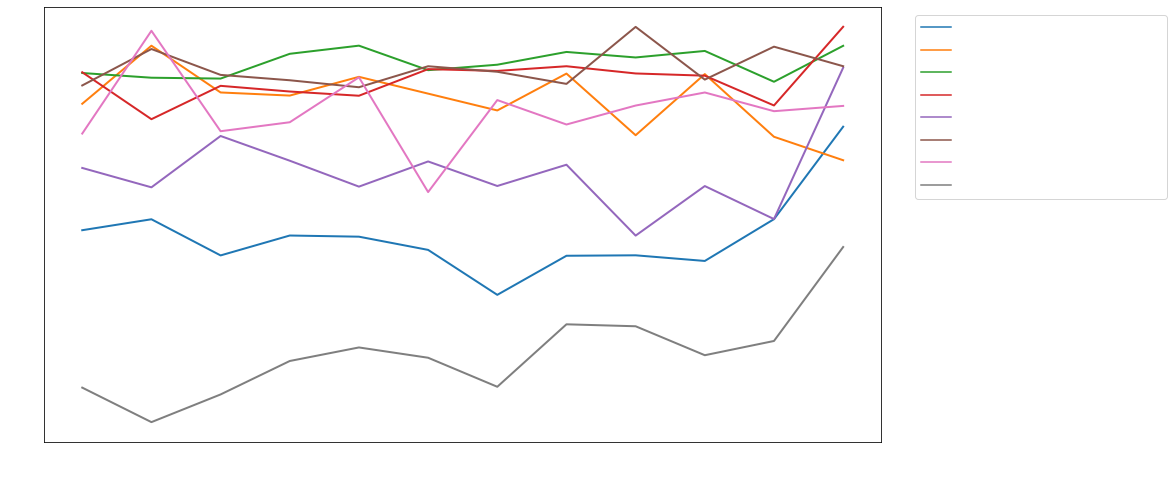

In [76]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>300).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['score'], hue=genre_filter["genres"], ci=None,linewidth = 2)
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

Top những thể loại phim được đánh giá cao từ khán giả là Drama,Romance - Drama, Comedy - Drama

## Ảnh hưởng của ngôn ngữ tới doanh thu phim là như thế nào?
- Hầu hết phim ra rạp đều có ngôn ngữ là tiếng Anh nên doanh thu của những phim tiếng Anh sẽ là lớn nhất.
- Vậy bên cạnh tiếng Anh liệu có ngôn ngữ phim nào được đón nhận hay không?

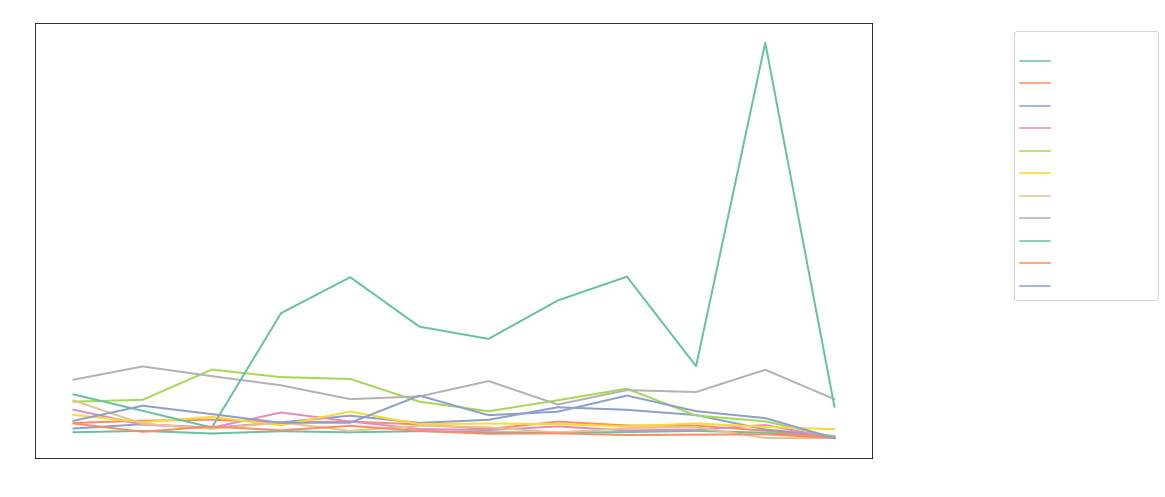

In [77]:
non_eng_movies=df[df["languages"].str.contains("English")==False]
non_eng=non_eng_movies.groupby('languages').filter(lambda x : len(x)>300).sort_values(by="release_date")

non_eng_graph=sns.lineplot(data=non_eng, x=non_eng["release_date"], y=non_eng['gross_worldwide'], hue=non_eng["languages"], ci=None,linewidth = 2, palette="Set2")
non_eng_graph.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15}, title="Language")
non_eng_graph.set(title="Gross worldwide of Non-English Films over the Years")

fig = plt.gcf()
fig.set_size_inches(15, 8)

- Phim có ngôn ngữ là tiếng Mandarin có doanh thu vượt trội so với những ngôn ngữ có 200 phim trở lên trong dataset. Lí giải cho điều này bởi Mandarin là tiếng phổ thông của Trung Quốc (hơn 900 triệu người sử dụng), việc có thêm ngôn ngữ này vào phim sẽ thu hút thêm người xem ở thị trường tỷ dân này.
- Phim có ngôn ngữ là tiếng Nhật có doanh thu cũng vượt trội theo sau. Lí giải cho điều nay có thể là do sự phát triển lớn mạnh của phim hoạt hình Nhật Bản (gần như bành trướng trong dòng phim hoạt hình).

## Một vài phim Việt có doanh thu cao

In [78]:
df[df.countries_of_origin.str.contains('Vietnam', na=False)][['title', 'directors', 'genres', 'release_date', 'gross_worldwide']].sort_values('gross_worldwide', ascending=False).head(10)

title            directors  \
20955                        Mắt Biếc           Victor Vu,   
17663                  Tiệc Trăng Máu   Quang Dung Nguyen,   
1156              Gai Gia Lam Chieu 3             Namcito,   
10200                      Hai Phuong         Le-Van Kiet,   
6960                   Cua Lại Vợ Bầu          Nhat Trung,   
2568    Chi Muoi Ba 2: 3 Ngay Sinh Tu        Vo Thanh Hoa,   
1983             Em La Ba Noi Cua Anh  Phan Gia Nhat Linh,   
19017  Tôi Thấy Hoa Vàng Trên Cỏ Xanh           Victor Vu,   
16354                   Chi Chi Em Em          Kathy Uyen,   
7523                          49 Ngày          Nhat Trung,   

                       genres  release_date  gross_worldwide  
20955          Drama,Romance,        2019.0        7061163.0  
17663           Comedy,Drama,        2020.0        6709383.0  
1156                  Comedy,        2020.0        5830719.0  
10200  Action,Drama,Thriller,        2019.0        5756185.0  
6960   Comedy,Family,Romance,        2019.0        5564332.0  
2568           Action,Comedy,        2020.0        4257126.0  
1983            Comedy,Music,        2015.0        3810429.0  
19017                  Drama,        2015.0        3293667.0  
16354         Drama,Thriller,        2019.0        2978284.0  
7523    Comedy,Drama,Romance,        2015.0        2904527.0